> **Confidence interval** is uncertainty in summary statistic represented as a range. In the other words, it is a range of values we are fairly sure our true value lies in. For example: I am 95% confident that the population mean falls between 8.76 and 15.88 $\rightarrow$ (12.32 $\pm$ 3.56)

Confidence interval tells you how confident you can be that the results from a poll or survey reflect what you would expect to find if it were possible to survey the entire population. It is difficult to obtain measurement data of an entire data set (*population*) due to limited resource & time. Your best shot is to survey a small fraction (*samples*) of the entire data set, and pray that your sample data represents the population reasonably well. 

Sample data may not be a good representation of a population by numerous factors (Ex: bias), and as a result, uncertainty is always introduced in any estimations derived from sample data. **Due to the uncertainty involved with sample data, any statistical estimation needs to be delivered in a range, not in a point estimate**.

How well a sample statistic estimates an underlying population parameter is always an issue (<a href="#population_vs_samples">Population vs. Samples</a>). A confidence interval addresses this issue by providing a range of values, which is likely to contain the population parameter of interest within the range of uncertainty.

<div id="toc_container">
    <p class="toc_title">Contents</p>
    <ul class="toc_list">
        <li>
            <a href="#Understanding confidence interval with analogy"><span class="toc_label">1</span>Understanding
                confidence interval with analogy</a>
            <ul>
                <li><a href="#Uncertainty in rock porosity"><span class="toc_label">Example 1:</span>Uncertainty in rock
                    porosity</a></li>
                <li><a href="#Purity of methamphetamine (crystal) in Breaking Bad"><span
                        class="toc_label">Example 2:</span>Purity of methamphetamine (crystal) in Breaking Bad</a></li>
                <li><a href="#dca"><span class="toc_label">Example 3:</span>Uncertainty in oil production forecast</a></li>
            </ul>
        </li>
        <li><a href="#quick-highlights"><span class="toc_label">2</span>Key takeaways</a></li>
        <li><a href="#population_vs_samples"><span class="toc_label">3</span>Population vs Samples</a></li>
        <ul>
            <li><a href="#sample_pop_var"><span class="toc_label">Notes:</span>Population variance $\sigma^2$ vs.
                Sample variance $s^2$</a></li>
            <li><a href="#python_variance"><span class="toc_label">Pythonic Tip:</span>Difference between Numpy variance
                and Pandas variance</a></li>
        </ul>
        <li><a href="#Confidence interval of different statistics"><span class="toc_label">4</span>Confidence interval
            of normal distribution</a></li>
        <ul>
            <li><a href="#conf_int_of_mean"><span class="toc_label">4.1</span>Confidence interval of mean</a></li>
            <ul>
                <li><a href="#dist_stats"><span class="toc_label">Notes:</span>Distribution of various statistics</a>
                </li>
                <li><a href="#t_vs_z"><span class="toc_label">Notes:</span>z-score vs t-score</a></li>
                <li><a href="#python_ci_mean"><span class="toc_label">Pythonic Tip:</span>Computing confidence interval of mean with SciPy</a></li>
            </ul>
            <li><a href="#conf_int_of_diff_in_mean"><span class="toc_label">4.2</span>Confidence interval of difference
                in mean</a></li>
            <ul>
                <li><a href="#anova"><span class="toc_label">Notes:</span>Comparing means of more than two samples with ANOVA</a></li>
                <li><a href="#ind_equal"><span class="toc_label">4.2.1</span>Independent (unpaired) samples, equal
                    variance - Student's t-interval</a></li>
                <ul>
                    <li><a href="#python_ind_equal"><span class="toc_label">Pythonic Tip:</span>Computing student's t-interval</a></li>
                </ul>
                <li><a href="#ind_unequal"><span class="toc_label">4.2.2</span>Independent (unpaired) samples, unequal variance - Welch's t-interval</a></li>
                <ul>
                    <li><a href="#python_ind_unequal"><span class="toc_label">Pythonic Tip:</span>Computing Welch's t-interval</a></li>
                </ul>
                <li><a href="#dep"><span class="toc_label">4.2.3</span>Dependent (paired) samples - Paired t-interval</a></li>
                <ul>
                    <li><a href="#python_dep"><span class="toc_label">Pythonic Tip:</span>Computing paired t-interval</a></li>
                </ul>
                <li><a href="#which_to_use"><span class="toc_label">Notes:</span>Deciding which t-test to use</a></li>
            </ul>
            <li><a href="#conf_int_of_var"><span class="toc_label">4.3</span>Confidence interval of variance</a></li>
            <ul>
                <li><a href="#chi_square"><span class="toc_label">Notes:</span>Chi-square $\chi^2$ distribution</a></li>
                <li><a href="#one_tail_two_tail"><span class="toc_label">Notes:</span>One-tail vs two-tail</a></li>
                <li><a href="#python_ci_var"><span class="toc_label">Pythonic Tip:</span>Computing confidence interval of variance with SciPy</a></li>
            </ul>
            <li><a href="#conf_int_of_other"><span class="toc_label">4.4</span>Confidence interval of other statistics: Bootstrap</a></li>
            <ul>
                <li><a href="#monte-carlo"><span class="toc_label">Notes:</span>Monte-Carlo method</a></li>
                <li><a href="#python_bootstrap"><span class="toc_label">Pythonic Tip:</span>Bootstrapping in Python</a></li>
            </ul>
        </ul>
        <li><a href="#conf_int_non_normal"><span class="toc_label">5</span>Confidence interval of non-normal distribution</a></li>
        <ul>
            <li><a href="#non-normal-issues"><span class="toc_label">5.1</span>Problems of non-normal distributions and central tendency</a></li>
            <ul>
                <li><a href="#cauchy"><span class="toc_label">Notes:</span>Cauchy distribution</a></li>
            </ul>
            <li><a href="#non-normal-robustness"><span class="toc_label">5.2</span>Robustness of confidence intervals to non-normality</a></li>
            <ul>
                <li><a href="#normality-test"><span class="toc_label">Notes:</span>Be cautious with hypothesis testing for normality</a></li>
                <li><a href="#python_qq_plots"><span class="toc_label">Pythonic Tip:</span>Q-Q plots with SciPy</a></li>
            </ul>
            <li><a href="#boxcox"><span class="toc_label">5.3</span>Transform to normal distribution: Box-Cox</a></li>
            <ul>
                <li><a href="#python_boxcox"><span class="toc_label">Pythonic Tip:</span>Box-Cox transform with SciPy and Scikit-Learn</a></li>
            </ul>
            <li><a href="#non_parametric_bootstrap"><span class="toc_label">5.4</span>Non-parametric alternative: Bootstrap</a></li>
        </ul>
    </ul>
</div>

<div id="Understanding confidence interval with analogy"></div>

## 1. Understanding confidence interval with analogy

If you've taken a science class with lab reports in your highschool or college, you probably had to include measurement error in your lab reports. For example, if you were asked to measure the length of a paper clip with a ruler, you have to include $\pm0.5 \,\text{cm}$ or $\pm0.05\,\text{cm}$ (depending on the spacing of tick marks) to account for the measurement error that shows the precision of your measuring tool. 

Based on <a href="#fig1">figure (1)</a>, the paper clip seems to be about 2.7 cm long, but we don't know for sure because the tickmarks in the ruler is not precise enough to measure decimal length. However, I can tell with 100% confidence that the paper clip has a length between 2 ~ 3 cm, because the clip is between the 2 cm and 3 cm tickmarks. You record the length of the paper clip in a *range*, instead of a *point estimate*, to account for the uncertainty introduced by the limitation of the measuring tool.

<div id="fig1" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_ruler.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: Measurement error in ruler</p></div>
</div>

Similar idea can be applied to a <a href="#conf_int_of_mean">confidence interval of mean</a>. You want to obtain a mean of a whole data set (*population*), but you can measure values of only a small fraction (*samples*) of the whole data set. This boils down to the traditional issue of <a href="#population_vs_samples">Population vs Samples</a>, due to the cost of obtaining measurement data of a large data set. Uncertainty is introduced in your samples, because you don't know if your samples are 100% representative of the population, free of bias. Therefore, you deliver your conclusion in a range, not in a point estimate, to account for the uncertainty.

<div><hr></div>

<div id="Uncertainty in rock porosity"></div>
<p style="color: #666"><b>Example 1:</b> Uncertainty in rock porosity<p>
    
(Borrowed from <a href="http://www.michaelpyrcz.com/" target="_blank">Dr. Michael Pyrcz's</a> Geostatistics class)
<p></p>

<p>A reservoir engineer in the oil & gas industry wants to know the rock porosity of a formation to estimate the total oil reserve 9,500 ft underground. Due to the high cost of obtaining rock core samples from the deep formations, he could acquire only 12 rock core samples. Since the uncertainty of a point estimation scales inversely with a sample size, his estimation is subject to non-negligible uncertainty. He obtains 14.5% average rock porosity with 4.3% standard deviation. Executives in the company wants to know the worst-case scenario (P10) and the best-case scenario (P90) to make business decisions. You can convey your estimation of average porosity with uncertainty by constructing the <a href="#conf_int_of_mean">confidence interval of mean</a>.</p>

<p>Assuming that you have a reason to believe that the rock porosity follows normal distribution, you can construct its 80% confidence interval, with the procedure described <a href="#python_ci_mean"> below</a>:</p>

<div style="margin-bottom: -20px"></div>

In [133]:
stats.t.interval(1 - 0.2, 12 - 1, loc=14.5, scale= 4.3 / np.sqrt(12))

(12.807569748569543, 16.19243025143046)

<div style="margin-top: -20px"></div>

The above range of uncertainty was acquired from the 12 rock core samples. In the worst-case scenario, the rock formation at 9,500 ft underground has 12.8% porosity. In the best-case scenario, the oil reservoir has 16.2% porosity. The same procedures can be applied for the core samples collected at different depths, which give us the confidence interval plot of rock porosities shown in <a href="#fig2">figure (2)</a>.

<div id="fig2" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="">
    <div class="col"><img src="jupyter_images/rock_por_conf_no_title.png"></div>
    <div class="col-12"><p class="image-description">Figure 2: Confidence interval of core samples porosities along depths</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (2)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import numpy as np
                from scipy import stats
                import matplotlib.pyplot as plt

                np.random.seed(39)

                depth = [i * 10 + 8000 for i in range(100)]
                l = len(depth)
                avg_por = []
                p10_por = []
                p90_por = []
                for i, item in enumerate(depth):

                    # You collect 12 rock core samples for each depth
                    # Assume that sample porosity follows a normal distribution
                    sample_size = 12
                    por_samples = np.random.normal(loc=0.15 - i/2000, scale=0.022, size=sample_size)
                    avg_por.append(np.mean(por_samples))
                    
                    # 80% confidence interval of mean
                    p10, p90 = stats.t.interval(1 - 0.2, sample_size - 1, loc=np.mean(por_samples), scale=stats.sem(por_samples))
                    p10_por.append(p10)
                    p90_por.append(p90)
                
                # plotting
                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(1, 2, figsize=(8, 4))

                ax[0].plot(avg_por[:l//2], depth[:l//2], 'k', label='P50', alpha=0.8)
                ax[0].plot(p10_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P10', linestyle='--')
                ax[0].plot(p90_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P90')

                ax[0].set_xlim(0.08, 0.17)
                ax[0].set_ylabel('Depth (ft)', fontsize=15)
                ax[0].set_xlabel('Porosity', fontsize=15)
                ax[0].fill_betweenx(depth[:l//2], p10_por[:l//2], p90_por[:l//2], facecolor='lightgrey', alpha=0.3)
                ax[0].invert_yaxis()

                ax[1].plot(avg_por[l//2:], depth[l//2:], 'k', label='P50', alpha=0.8)
                ax[1].plot(p10_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P10', linestyle='--')
                ax[1].plot(p90_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P90')

                ax[1].set_xlim(0.08, 0.17)
                ax[1].set_xlabel('Porosity', fontsize=15)
                ax[1].legend(loc='best', fontsize=14, framealpha=1, frameon=True)
                ax[1].fill_betweenx(depth[l//2:], p10_por[l//2:], p90_por[l//2:], facecolor='lightgrey', alpha=0.3)
                ax[1].invert_yaxis()
            </code>
        </pre>
    </div>
</div>

<div><hr></div>

<div id="Purity of methamphetamine (crystal) in Breaking Bad"></div>
<p style="color: #666"><b>Example 2:</b> Purity of methamphetamine (crystal) in Breaking Bad<p>

21 batches of crystal cooked by Mr. White shows 99.1% average purity with 3% standard deviation. 18 batches of crystal cooked by Mr. Pinkman shows 96.2% average purity with 4% standard deviation. Does Mr. White always cook better crystal than Mr. Pinkman, or is it possible for Mr. Pinkman to beat Mr. White in purity of cooked crystals, by luck?

We can construct 95% confidence interval assuming normal distribution, with the procedure described <a href="#python_ci_mean">below</a>:

<div style="margin-bottom: -20px"></div>

In [78]:
# Mr. White's

stats.t.interval(1 - 0.05, 21 - 1, loc=99.1, scale= 3 / np.sqrt(21))

(97.73441637228476, 100.46558362771523)

In [79]:
# Mr. Pinkman's

stats.t.interval(1 - 0.05, 18 - 1, loc=96.2, scale= 4 / np.sqrt(18))

(94.21084679714819, 98.18915320285181)

<div style="margin-top: -20px"></div>

There's a small overlap between the confidence intervals of Mr. White's and Mr. Pinkman's. Although it is true that Mr. White is a better cooker, Mr. Pinkman can cook a purer batch of crystals by a small chance, if he has the luck. Comparing the means of two sample data sets is closely related to constructing <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a>.

<div id="fig3" class="row full_screen_margin_md mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/crystal_purity.png"></div>
    <div class="col-12"><p class="image-description">Figure 3: Overlap in the 95% confidence interval of two samples</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (3)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import matplotlib.pyplot as plt
                from scipy import stats
                import numpy as np

                conf_pinkman = stats.t.interval(1 - 0.05, 18 - 1, loc=96.2, scale= 4 / np.sqrt(18))
                conf_white = stats.t.interval(1 - 0.05, 21 - 1, loc=99.1, scale= 3 / np.sqrt(21))

                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(figsize=(5, 2))

                ax.errorbar(99.1, 1, xerr=(conf_white[1] - conf_white[0]) / 2, 
                            fmt='o', markersize=8, capsize=5, label='Mr. White\'s', color='grey')
                ax.errorbar(96.2, 0, xerr=(conf_pinkman[1] - conf_pinkman[0]) / 2, 
                            fmt='o', markersize=8, capsize=5, label='Mr. Pinkman\'s', color='k')
                ax.set_ylim(-0.6, 1.6)
                ax.fill_betweenx([1, 0], conf_white[0], conf_pinkman[1], facecolor='lightgrey', alpha=0.3)
                ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
                ax.set_xlabel('Purity (%)', fontsize=12)
                ax.yaxis.set_major_formatter(plt.NullFormatter())
                fig.tight_layout();
            </code>
        </pre>
    </div>
</div>

<div><hr></div>

<div id="dca"></div>
<p style="color: #666"><b>Example 3:</b> Uncertainty in oil production forecast<p>

A production engineer in the oil & gas industry wants to know the worst-case scenario (P10) and the best-case scenario (P90) of hydrocarbon production forecast. In petroleum engineering, we use a technique called Decline Curve Analysis (DCA) to project future hydrocarbon production. It is important to quantify the uncertanties of your DCA model, as the uncertainty in oil production can be as large as millions of dollars worth; executives in a company make business decisions based on P10 and P90 values.

There are mainly three models for DCA: exponential, hyperbolic, and harmonic. For demonstration purpose, hyperbolic model will be used here. Hyperbolic decline curve can be defined as:

<div style="font-size: 1rem;">
$$ q = \frac{q_i}{(1+bD_it)^{1/b}}$$
</div>

It is a non-linear regression problem with three parameters to optimize: $Di$, $q_i$, and $b$. The independent variable is time $t$. We can construct the confidence interval of regression model to get P10 and P90 values. Since the analytical solution for the confidence interval of non-linear model is complicated, and the <a href="#non-normal-issues">data is not normally distributed</a>, we use non-parametric numerical alternative, <a href="#conf_int_of_other">bootstrap</a>, to obtain the following uncertainty forecast model:

<div id="fig4" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: px;">
    <div class="col"><img src="jupyter_images/bootstrap_dca.png"></div>
    <div class="col-12"><p class="image-description">Figure 4: Uncertainty in decline curve analysis forecast</p></div>
</div>

<div style="margin-top: -20px;"></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (4)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import numpy as np
                import pandas as pd
                import matplotlib.pyplot as plt
                from scipy.optimize import curve_fit

                ##################################### Prepare Data #########################################

                file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/decline_curve.xlsx'
                df = pd.read_excel(file, sheet_name='sheet_1')
                df = df[df['Oil Prod. (bopd)'] > 200]           # remove bad data points
                t = df['Time'][1:].values[: -40]
                y = df['Oil Prod. (bopd)'][1:].values[:-40]
                x = np.array([i for i in range(len(t))])

                #################################### Define function #######################################

                def hyperbolic(x, qi, b, Di):
                    return qi / (1 + b * Di * x) ** (1 / b)

                ################################# Bootstrap regression #####################################

                np.random.seed(42)

                y_boot_reg = []
                for i in range(1000):

                    # Bootstrapping
                    boot_index = np.random.choice(range(0, len(y)), len(y))
                    x_boot = x[boot_index]
                    y_boot = y[boot_index] 

                    # Curve fit data
                    popt, pcov = curve_fit(hyperbolic, x_boot, y_boot, maxfev=100000, p0=[max(y), 0.1, 0.1])

                    # Define predicted region
                    pred_x = [i for i in range(x[-1], x[-1] + 20)][1:] 
                    x_new = np.append(x, np.array([pred_x]))

                    # Predict
                    y_boot_reg = y_boot_reg + [hyperbolic(x_new, *popt)]

                y_boot_reg = np.array(y_boot_reg)

                p10 = np.percentile(y_boot_reg, 10, axis=0)
                p50 = np.percentile(y_boot_reg, 50, axis=0)
                p90 = np.percentile(y_boot_reg, 90, axis=0)

                # Basic curve fit
                popt, pcov = curve_fit(hyperbolic, x, y, maxfev=100000, p0=[max(y), 0.1, 0.1])

                ###################################### Plotting ##########################################

                fig, ax = plt.subplots(figsize=(8, 4))

                for reg_sample in y_boot_reg:
                    ax.plot(x_new, reg_sample, color='grey', alpha=0.3)
                ax.plot(x, y, '--o', color='k', alpha=1)
                ax.plot(x_new, p10, ':',color='#1f77b4', alpha=1, label='P10')
                ax.plot(x_new, hyperbolic(x_new, *popt), color='r', label='P50')
                ax.plot(x_new, p90, '-.',color='#1f77b4', alpha=1, label='P90')

                ax.set_yscale('log')
                ax.set_ylim(80, 30000)
                ax.set_xlim(-2, 57)
                ax.set_xlabel('Months', fontsize=15)
                ax.set_ylabel('Oil Production (bopd)', fontsize=15)
                ax.set_title('Uncertainty in decline curve analysis with Bootstrap', fontsize=18)
                ax.grid(True, linestyle='--', color='#acacac')

                ax.axvspan(-2, x[-1], facecolor='#efefef', alpha=0.5)
                ax.axvspan(x[-1], 57, facecolor='lightgrey', alpha=0.5)

                ax.text(0.38, 0.1, 'Fitted region', fontsize=15,
                        transform=ax.transAxes, color='k')
                ax.text(0.7, 0.1, 'Predicted region', fontsize=15,
                        transform=ax.transAxes, color='k')
                ax.text(0.27, 0.91, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
                        transform=ax.transAxes, color='grey', alpha=0.5)
                ax.legend()

                fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div id="quick-highlights"></div>

## 2. Key takeaways

<div class="highlights" id="key1">
    <div class="highlights-title">1. Confidence interval quantifies uncertainty of statistical estimation</div>
    <div class="highlights-content">Confidence interval qunatifies the uncertainty related to a statistical estimation to mitigate the issue of <a href="#population_vs_samples">Population vs. Samples</a>. It is always expressed in a range like — $\text{C.I.}: \quad \bar{x} \pm 3.43$ or $-51.4 < \bar{x} < -43.2$</div>
</div>

<div class="highlights" id="key2">
    <div class="highlights-title">2. Confidence interval is the basis of parametric hypothesis tests</div>
    <div class="highlights-content">Confidence interval is the basis of parametric hypothesis tests. For example, <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a> computes its p-value using the <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a>. When samples follow a normal distribution, and therefore their centeral tendency can be described by their means, t-test can be used to conclude if two distributions are significantly different from each other. 
    </div>
</div>

<div class="highlights" id="key3">
    <div class="highlights-title">3. Formula for confidence interval varies with statistics</div>
    <div class="highlights-content">
        <p>For <a href="#conf_int_of_mean">confidence interval of mean</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{mean}}: \quad \mu \pm (t_{\frac{\alpha}{2},df} \times \frac{s}{\sqrt{n}})$$</div></p>
        <p>For <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}})$$</div></p>    
        <p>For confidence interval of proportion</p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{proportion}}: \quad \hat{p} \pm (t_{\frac{\alpha}{2},df} \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} )$$</div></p>
        <p>For <a href="#conf_int_of_var">confidence interval of variance</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{variance}}: \frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}}} \leq \sigma^2 \leq \frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}}}$$</div></p>
        <p>For confidence interval of standard deviation</p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{standard deviation}}: \sqrt{\frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}}}} \leq \sigma \leq \sqrt{\frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}}}}$$</div></p>
        <p>Different analytical solutions exist for different statistics. However, confidence interval for many other statistics cannot be analytically solved, simply because there are no formulas for them. If the statistic of your interest does not have an analytical solution for its confidence interval, or you simply don't know it, numerical methods like <a href="#conf_int_of_other">boostrapping</a> can be a good alternative (and its powerful).</p>
    </div>
</div>

<div class="highlights" id="key4">
    <div class="highlights-title">4. Parametric methods suffer loss in accuracy under non-normality</div>
    <div class="highlights-content">The equations listed above <b>are not valid if sample data set is not normally distributed</b>. In case of non-normally distributed data, its confidence interval can be obatined with non-parametric methods like <a href="#conf_int_of_other">boostrapping</a>, or instead use credible interval, which is a Baysian equivalent of confidence interval. Or you can transform your data into normal distribution using <a href="#boxcox">Box-Cox transformation</a>. Make sure that you understand robustness of parametric vs. non-parametric methods for non-normal distributions, which is discussed in detail <a href="#non_parametric_bootstrap">below</a>.</div>
</div>

<div class="highlights" id="key5">
    <div class="highlights-title">5. 95% C.I. does not mean 95% of the sample data lie within the interval.</div>
    <div class="highlights-content">It means that there's 95% chance that the estimated statistic falls within the interval. 95% confidence interval relates to the reliability of the estimation procedure. Ex: How reliable is your estimation of population variance?</div>
</div>

<div class="highlights" id="key6">
    <div class="highlights-title">6. Always use t-score instead of z-score</div>
    <div class="highlights-content">When constructing confidence interval of mean, or running t-test, always use t-score instead of z-score. This is because t-distribution accounts for bigger uncertainty in samples than normal distribution when sample size is samll, but converges to normal distribution when sample size is bigger than 30. The concept is described in detail <a href="#t_vs_z">below</a>.</div>
</div>

<div class="highlights" id="key7">
    <div class="highlights-title">7. Bigger sample size gives narrower confidence intervals</div>
    <div class="highlights-content">Intuitively, this is because the more samples we have, the less uncertainty we have with our statistical estimation. Mathematically, this is because the the confidence interval is inversely related to the sample size $n$, as shown in <a href="#eq-1">eq (1)</a>.</div>
</div>

<div class="highlights" id="key8">
    <div class="highlights-title">8. Means are not always equivalent to central tendency</div>
    <div class="highlights-content">When samples are not normally distributed, their means are not a good measure of their <a href="#non-normal-issues">centeral tendencies</a>. For example, if you are comparing the means of two non-normal data sets with t-test to conclude if they came from the same population, your approach is wrong. The more viable alternative would be to use non-parametric alternatives that uses median, or other statistics that capture the central tendency of non-normal distributions.</div>
</div>



<div id="population_vs_samples"></div>

## 3. Population vs. samples

Confidence interval describes the amount of uncertainty associated with a sample estimate of a population parameter. One needs to have a good understanding of the difference between samples and population to understand the necessity of delivering statistical estimations in a range, a.k.a. confidence interval.

<div id="fig5" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="
    margin-top: 10px;
">
    <div class="col"><img src="jupyter_images/conf_int_sample_pops.png"></div>
    <div class="col-12"><p class="image-description">Figure 5: Population vs samples</p></div>
</div>

> **Population**: data set that contains all members of a specified group. Ex: ALL people living in the US.

> **Samples**: data set that contains a part, or a subset, of a population Ex: SOME people living in the US.

<div><hr></div>

Let's say that you are conducting a phone-call survey to investigate the society's perception of The Affordable Care Act (“Obamacare”). Since you can't call all 327.2 million people (*population*) in the US, you call about 1,000 people (*samples*). Your poll showed that 59% of the registered voters support Obamacare. This does not agree with the actual survey conducted in 2018; 53% favorable, 42% unfavorable (<a href="http://www.msnbc.com/rachel-maddow-show/poll-shows-support-obamacare-reaching-all-time-high" target="_blank">source</a>). What could be the source of error? 

Since (formal) president Obama is a member of the Democratic Party, the voters' response can be affected by their political preference. How could you tell that the 1,000 people you called happened to be mostly Democrats, who's more likely to support Obama's policy, because they share similar political view? The samples you collected could have been *biased*, but you don't that know for sure. Of course, the voters' response could be affected by many other factors like race, age, place of residence, or financial status. The idea is that, there will always be uncertainty involved with your estimation, because you don't have an access to the entire population.  

Confidence interval is a technique that quantifies the uncertainty when estimating a population parameter from samples.

<div id="sample_pop_var"></div>

<div class="alert alert-info">
    <h4>Notes: Population variance $\sigma^2$ vs. Sample variance $s^2$</h4>
    <p>Distinction between population parameter and sample parameter is important. In statistics, it is a common practice to denote population variance as $\sigma^2$, and sample variance as $s^2$. The distinction is important because different equations are used for each.</p>
    <p>For population:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{variance} = \sigma^2 = \frac{\sum(x - \bar{x})^2}{n} $$</div></p>
    <p>For samples:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{variance} = s^2 = \frac{\sum(x - \bar{x})^2}{n-1} $$</div></p>
    <p>The divisor $n-1$ is a correction factor for bias. Note that the correction has a larger proportional effect when $n$ is small than when $n$ is large, which is what we want because the more samples we have, the better the estimation. This idea is well explained on this <a href="https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation" target="_blank">StackExchange thread</a>.</p>
</div>

<div><hr></div>

<div id="python_variance"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Difference between Numpy variance and Pandas variance<p>

Different libraries make different assumption about an input array. The default value of <code>ddof</code> is different for Pandas and Numpy, resulting in different variance. <code>ddof</code> represent degrees of freedom, and setting <code>ddof=True</code> or <code>ddof=1</code> tells the variance function to calculate sample variance by accounting for the bias factor $n-1$ (recall that in Python, <code>True==1</code>.) Remember that there is a distinction between <a href="#sample_pop_var">Population variance ($\sigma^2$) vs. Sample variance ($s^2$).</a>

If you are confused which library is computing which variance (sample or population), just remember this: whatever library you are using, use <code>ddof=True</code> or <code>ddof=1</code> to compute sample variance, and use <code>ddof=False</code> or <code>ddof=0</code> to compute population variance.
<div style="margin: -20px"></div>

In [1]:
import numpy as np
import pandas as pd

arr = pd.DataFrame([5,3,1,6])

In [7]:
# numpy, population
arr.values.var()

3.6875

In [8]:
# numpy, sample
arr.values.var(ddof=1)

4.916666666666667

In [10]:
# pandas, population
arr.var(ddof=0)

0    3.6875
dtype: float64

In [99]:
# pandas, sample
arr.var()

0    4.916667
dtype: float64

<div id="Confidence interval of different statistics"></div>

## 4. Confidence interval of normal distribution

Computing confidence interval of a statistic depends on two factors: type of statistic, and type of sample distribution. As explained <a href="#quick-highlights">above</a>, different formulas exist for different type of statistics (Ex: mean, std, variance), and different methods (Ex: <a href="#conf_int_of_other">boostrapping</a>, credible interval, <a href="#boxcox" target="_blank">Box-Cox transformation</a>) are used for non-normal data set. 

We will cover confidence interval of mean, difference in mean and variance.

<div id="conf_int_of_mean"></div>

### 4.1. Confidence interval of mean

Confidence interval of mean is used to estimate the population mean from sample data and quantify the related uncertainty. Consider the following figure:

<div id="fig6" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_pop_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 6: Distribution of population and C.I. of mean</p></div>
</div>

In <a href="#fig6">figure (6)</a>, assume that the population is normally distributed. Since we don't have an access to the entire population, we have to guess the <span style="color: #ed7d32; font-weight: 500;">population mean (unknown)</span> to the best of our ability using sample data set. We do this by computing the <span style="color: #70ad47; font-weight: 500;">sample mean</span> and constructing its <span style="color: #385624; font-weight: 500;">95% confidence interval</span>. Note that the popular choices of confidence level are: 90%, 95%, and 99%

Assuming normality of population, its sample means are also normally distributed. Let's say that you have a population, and you draw small fractions of it $N$ times. Then, the computed means of $N$ sample sets $\boldsymbol{\mu}=(\mu_1, \mu_2,..., \mu_{N-1}, \mu_N)$ is normally distributed as shown in <a href="#fig7">figure (7)</a>. Their confidence intervals are represented as the black horizontal arrows:.

<div id="fig7" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_mean.png"></div>
    <div class="col-12"><p class="image-description">Figure 7: Distribution of sample mean and its C.I.</p></div>
</div>

You can see that the confidence interval of <span style="color: red; font-weight: 500;">$\mu_5$</span> does NOT include the <span style="color: #70ad47; font-weight: 500;">green vertical dashed line</span>, 12.31. Let's assume that 12.31 is the true population mean (we never know if this is the actual population mean or not, but let's assume). If we get <span style="color: red; font-weight: 500;">$\mu_5$</span> and its confidence interval as our estimation of the population mean, then our estimation is wrong. There is a 5% chance of this happening, because we set our confidence level as 95%. Note that the width of the confidence intervals (black horizontal arrows) depend on the sample size, as shown in <a href="#eq-1">eq (1)</a>

The grey area of <a href="#fig6">figure (6)</a> is essentially equivalent to the grey area of <a href="#fig7">figure (7)</a>. $\mu_1$ = 12.32 is the sample mean, and $\pm$ 3.56 is the uncertainty related to the sample mean with 95% confidence. The uncertainty is a product of distribution score and standard error of mean. Distribution score essentially tells how many standard error are the limits (8.76 and 15.88) away from the center (12.32). Choosing larger confidence level results in larger confidence interval. This increases the grey area in <a href="#fig6">figure (6)</a> and <a href="#fig7">figure (7)</a>. 

We convey 95% confidence interval of mean like this:

> I am 95% confident that the population mean falls between 8.76 and 15.88. If I sample data 20 times, 19 times the sample mean will fall between 8.76 ~ 15.88, but expect that I will be wrong 1 time.

<div id="dist_stats"></div>
<div class="alert alert-info">
    <h4>Notes: Distribution of various statistics</h4>
    <p>Different statistics exhibit different distributions. Normality of samples does not guarantee normality of its statistics. When the samples are normally distributed, their means are normally distributed, but their variances are chi-square <span style="font-size: 90% !important">$\chi^2$</span> distributed. More discussion about the distribution of variance and <span style="font-size: 90% !important">$\chi^2$</span> distribution is covered <a href="#chi_square">below</a>. Note that these assumptions are invalid when samples are non-normal.</p>
    <img class="" style="border: 1px solid #ddd;" src="jupyter_images/chi_norm.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import numpy as np

                    df_values = [1, 2, 6, 9]
                    linestyles = ['-', '--', ':', '-.']
                    normal_params = [(10, 1), (11, 1), (10, 2), (10, 3)]
                    x = np.linspace(-1, 20, 1000)
                    
                    plt.style.use('seaborn-whitegrid')
                    fig, ax = plt.subplots(1, 2, figsize=(13.3, 5))
                    fig.tight_layout()
                    plt.subplots_adjust(left=0.09, right=0.96, bottom=0.12, top=0.93)

                    for df, norm_p, ls in zip(df_values, normal_params, linestyles):
                        ax[1].plot(x, stats.chi2.pdf(x, df, loc=0, scale=1),
                                   ls=ls, c='black', label=r'Degrees of freedom$=%i$' % df)
                        ax[0].plot(x, stats.norm.pdf(x, loc=norm_p[0], scale=norm_p[1]), 
                                   ls=ls, c='black', label='Mean = %d, ' % norm_p[0] + 'Std = %s' % norm_p[1])

                    ax[0].set_xlim(4, 16)
                    ax[0].set_ylim(-0.025, 0.525)
                    ax[0].set_xlabel('$x$', fontsize=20)
                    ax[0].set_ylabel(r'Probability', fontsize=20)
                    ax[0].set_title(r'Distribution of means: normal distribution', fontsize=20)
                    ax[0].legend(loc='upper left', fontsize=16, framealpha=1, frameon=True)

                    ax[1].set_xlim(0, 10)
                    ax[1].set_ylim(-0.025, 0.525)
                    ax[1].set_xlabel('$\chi^2$', fontsize=20)
                    ax[1].set_title(r'Distribution of variances: $\chi^2$ distribution', fontsize=20)
                    ax[1].legend(loc='best', fontsize=16, framealpha=1, frameon=True)
                </code>
            </pre>
        </div>
    </div>
</div>

If sample data is normal or normal-like distributed, we almost always assume t-distribution to compute confidence interval, as explained <a href="#t_vs_z">below</a>. Then, the confidence interval of mean has the following analytical solution:

<div id="eq-1" style="font-size: 1rem;">
$$ \text{C.I.}_{\text{mean}}: \quad \mu \pm (t_{1-\frac{\alpha}{2},df} \times \frac{s}{\sqrt{n}}) \tag{1}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: significance level</div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom. In this example, df = $n$ - 1<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and $df$</div>
    </div>   
</div>

Recall that when computing $s$, correction factor ($n-1$) is applied to account for sample bias, as explained <a href="#sample_pop_var">above</a>. Pay close attention to the standard error $\frac{s}{\sqrt{(n)}}$. As the sample size $n$ increases, the standard error decreases, reducing the range of confidence interval. This is intuitive in a sense that, the more samples we have, the less uncertainty we have with our statistical estimation. The length of the black horizontal arrows in <a href="#fig7">figure (7)</a> depends on the sample size. The larger the sample size, the narrower the width of arrows, and vice versa.

<div id="t_vs_z"></div>
<div class="alert alert-info">
    <h4>Notes: z-score vs t-score</h4>
    <p>You've probably seen mixed use of z-score and t-score for confidence interval during your studies. Long story short, it is safe and almost always better to use t-score than z-score.</p>
    <p>Z-score ($z_{\frac{\alpha}{2}}$) is used for normal distribution, and t-score ($t_{\frac{\alpha}{2},df}$) is used for t-distribution. You use z-score if you know the population variance $\sigma^2$. If not, you use t-score. Since the population variance $\sigma^2$ is almost never known, you almost always use t-score for confidence interval. After all, the purpose of using confidence interval is to mitigate the issue of <a href="#population_vs_samples">Population vs. Samples</a> when estimating population parameter ($\sigma^2$) from samples. If you know the population parameters, you probably don't need confidence interval in the first place.</p>
    <p>A natural question is, "how is it safe to use t-score instead of z-score? Shouldn't I be using z-score since I know that the population is normally distributed, from previous knowledge?" It is safe to do so because t-distribution converges to normal distribution according to the Centeral Limit Theorem. Recall that t-distribution behaves more and more like a normal distribution as the sample size increases.</p>
    <p>Google <i>"95% confidence z-score"</i> and you will see $z$ = 1.96 at 95% confidence level. On the other hand, t-score approaches  1.96 as its degrees of freedom increases: $\lim_{df \to \infty}t$ = 1.96. For 95% confidence level, $t$ = 2.228 when $n$ - 1 = 10 and $t$ = 2.086 when $n$ - 1 = 20. This is why it is safe to always replace z-score with t-score when computing confidence interval.</p>
</div>

<div style="margin: -20px"></div>
<div><hr></div>

<div id="python_ci_mean"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing confidence interval of mean with SciPy<p>

We can compute confidence interval of mean directly from using <a href="#eq-1">eq (1)</a>. Recall to pass <code>ddof=1</code> to make sure to compute sample standard deviation $s$, not population standard deviation $\sigma$, as explained <a href="#python_variance">above</a>. 

We will draw random samples from normal distribution using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html" target="_blank">np.random.normal().</a> Note that <code>loc</code> is for population mean, and <code>scale</code> is for population standard deviation, and <code>size</code> is for number of samples to draw.

<div style="margin: -20px"></div>

In [15]:
from scipy import stats
import numpy as np

np.random.seed(42)

arr = np.random.normal(loc=74, scale=4.3, size=20)

alpha = 0.05                       # significance level = 5%
df = len(arr) - 1                  # degress of freedom = 20
t = stats.t.ppf(1 - alpha/2, df)   # t-critical value for 95% CI = 2.093
s = np.std(arr, ddof=1)            # sample standard deviation = 2.502
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))

In [2]:
(lower, upper)

(71.33139551903422, 75.19543685256606)

<div style="margin-top: -20px"></div>

Or we can compute with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html" arget="_blank">scipy.stats.t.interval().</a> Note that you don't divide <code>alpha</code> by 2, because the function does that for you. Also note that the standard error of mean $\frac{s}{\sqrt{n}}$ can be computed with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html" target="_blank">scipy.stats.sem()</a>

In [130]:
stats.t.interval(1 - alpha, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))

(71.33139551903422, 75.19543685256606)

<div style="margin-top: -20px"></div>

Note the default value of <code>loc=0</code> and <code>scale=1</code>. This will assume sample mean $\mu$ to be 0, and standard error $\frac{s}{\sqrt{n}}$ to be 1, which assumes standard normal distribution of mean = 0 and standard deviation = 1. <u>This is NOT what we want.</u>

In [8]:
stats.t.interval(1 - alpha, len(arr) - 1)

(-2.093024054408263, 2.093024054408263)

<div style="margin-top: 30px" id="conf_int_of_diff_in_mean"></div>

### 4.2. Confidence interval of difference in mean

Confidence interval of difference in mean is not very useful by itself. But it is important to understand how it works, because it forms the basis of one of the most widely used hypothesis test: <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a>. 

Often we are interested in knowing if two distributions are significantly different. In the other words, we want to know if two sample data sets came from the same population by <a href="#">comparing central tendency of populations</a>. A standard approach is to check if the sample means are different. However, this is a misleading approach in a sense that the means of samples are almost always different, even if the difference is microscopic. More useful would be to estimate the difference in a <i>range</i> to account for uncertainty, and compute probability that it is big enough to be of practical importance. T-test checks if the difference is "close enough" to zero by computing the confidence interval of difference in means.

<u>T-test hypothesis</u>

<div  style="font-size: 1rem;">
$$ H_0: \mu_1 - \mu_2 = 0 \tag{2}$$
</div>
<div  style="font-size: 1rem;">
$$ H_1: \mu_1 - \mu_2 \neq 0 \tag{3}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div> 
    <div class="row">
        <div class="col-3"><p>$H_0$<p></div>
        <div class="col-9"><p>: null hypothesis — sample means are the same "enough"<p></div>
    </div>
    <div class="row">
        <div class="col-3">$H_1$</div>
        <div class="col-9"><p>: alternate hypothesis — sample means are "significantly" different</p></div>
    </div>    
</div>

Note that the above hypothesis tests whether the mean of one group is significantly DIFFERENT from the mean of the other group; we are using two-tailed test. This does not check if the mean of one group is significantly GREATER than the mean of the other group, which uses one-tailed test.

<div id="anova"></div>
<div class="alert alert-info">
    <h4>Notes: Comparing means of more than two samples with ANOVA</h4>
    <p>Analysis of variance (ANOVA) checks if the means of two or more samples are significantly different from each other. Using t-test is not reliable in cases where there are more than 2 samples. If we conduct multiple t-tests for comparing more than two samples, it will have a compounded effect on the error rate of the result.</p>
    <p>ANOVA has the following hypothesis:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$
        \begin{align}
           H_0: &\mu_1 = \mu_2 = \, \cdots \, =\mu_L \\[5pt]
           H_1: &\mu_a \neq \mu_b
        \end{align}
    $$</div></p>
    <p>where $L$ is the number of groups, and $\mu_a$ and $\mu_b$ belong to any two sample means of any groups. <a href="https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/" target="_blank">This article</a> illustrates the concept of ANOVA very well.</p>
</div>

<div id="fig8" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_diff_means.png"></div>
    <div class="col-12"><p class="image-description">Figure 8: Distributions of samples</p></div>
</div>

In <a href="#fig8">figure (8)</a>, $\mu$ represents the sample mean. If two sample data sets are from the same population, the distribution of means will be similar "enough". If not, they will be "significantly" different. It can be visually inspected by the area of overlap. The larger the overlap, the bigger the chance of the two distributions originating from the same population.

The more robust way to compare sample means would be to construct the confidence interval of difference in means. If the two samples came from the same population, they should have the similar "enough" means. Their difference should be close to zero and satisfy (or fail to reject) the null hypothesis <span style="color: #ed7d32; font-weight: 500;">$H_0: \mu_1 - \mu_2 = 0$</span> within a range of uncertainty. Consider the following figure:

<div id="fig9" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_diff_means_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 9: Distribution of difference in means</p></div>
</div>

In <a href="#fig9">figure (9)</a>, the calculated difference in sample means is <span style="color: #70ad47; font-weight: 500;">$\mu_1 - \mu_2 = 1.00$</span>. We deliver the uncertainty related to our estimation of difference in sample means by constructing its <span style="color: #385624; font-weight: 500;">95% confidence interval $[$-1.31 ~ 3.31$]$</span>. Since the null hypothesis <span style="color: #ed7d32; font-weight: 500;">$H_0: \mu_1 - \mu_2 = 0$</span> is within the 95% confidence interval (<span style="color: #929292; font-weight: 500;">grey shaded area</span>), we accept the null hypothesis; we conclude that the samples have the same means within the uncertainty.

However, if the null hypothesis is not within the confidence interval and falls in the **2.5% outliers** zone, we reject the null hypothesis and accept the alternate hypothesis <span style="color: #030303; font-weight: 500;">$H_1: \mu_1 - \mu_2 \neq 0$</span>. In the other words, we conclude that the sample means are significantly different.

<div style="margin: -20px"></div>
<div><hr></div>

<div id=""></div>
<p style="color: #666"><b>Three variations of confidence interval of difference in means</b><p>

There are three variations of t-test, and therefore there are three variations of confidence interval of difference in means. The difference & application of the three variations are really well-explained in <a href="https://en.wikipedia.org/wiki/Student%27s_t-test" target="_blank">Wikipedia</a> (one of the few that are actually easy to understand, with minimum jargons.)

<ol class="rounded-list" style="margin-bottom: 40px !important; margin-top: 40px! important;">
    <li><p><a href="#ind_equal">Independent (unpaired) samples, equal variance - Student's t-interval</a></p></li>
    <li><p><a href="#ind_unequal">Independent (unpaired) samples, unequal variance - Welch's t-interval</a></p></li>
    <li><p><a href="#dep">Dependent (paired) samples</a></p></li>
</ol>

Recall that all t-tests assume normality of data. However, they are pretty robust to non-normality as long as the deviation from normality isn't large. Visualize your distributions to test this. Robustness of t-test to non-normality is discussed in detail <a href="robustness">below</a>.

<div id="ind_equal"></div>

#### 4.2.1. Independent (unpaired) samples, equal variance - student's t-interval

When you have a reason to believe that samples have nearly equal variances, you can use student's t-test to check if difference in means are significantly different. Note that student's t-test works pretty well even with unequal variances as long as sample sample sizes are equal or nearly equal, and sample sizes are not tiny. 

However, it is recommended to always use Welch's t-test by assuming unequal variances, as explained <a href="#which_to_use">below</a>. Use student's t-test if you are ABSOLUTELY sure that the population variances are nearly equal. 

Confidence interval of difference in mean assuming equal variance (student's t-interval) can be calculated as follows:

<div id="eq-4" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}})\,, \quad s_p = \sqrt{\frac{(n_1-1)s_{1}^2 + (n_2-1)s_{2}^2}{n_1+n_2-2}} \tag{4}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3">$\mu$</div>
        <div class="col-9">: sample mean</div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: significance level</div>
    </div>    
    <div class="row">
        <div class="col-3">$n$</div>
        <div class="col-9">: number of samples</div>
    </div>
    <div class="row">
        <div class="col-3">$df$</div>
        <div class="col-9">: degrees of freedom</div>
    </div>    
    <div class="row">
        <div class="col-3">$s_p$</div>
        <div class="col-9">: pooled standard deviation</div>
    </div>  
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The formula for the pooled standard deviation $s_p$ looks a bit overwhelming, but its just an weighted average standard deviation of two samples, with <a href="#sample_pop_var">bias correction factor</a> $n_i-1$ for each sample. Recall that student's t-test assumes equal variances of two samples. You calculate what is assumed to be the common variance (=pooled variance, $s_p^2$) by computing the weighted average from each sample's variance.

In <a href="#eq-4">eq (4)</a>, $t$-score depends on significance level $\alpha$ and degrees of freedom $df$. In student's t-test, which assumes equal variance:

<div id="eq-5" style="font-size: 1rem;">
$$ df = n_1 + n_2 -2 \tag{5}$$
</div>

<div><hr></div>

<div id="python_ind_equal"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing student's t-interval<p>

Unfortunately, SciPy doesn't support computing confidence intereval of difference in mean separately. It is incorporated into computing t-statistic and p-value of t-test, but users can't access its underlying confidence interval. Note that in R, users have access to the CI of difference in means.

We can compute CI of difference in means assuming equal variance with <a href="#eq-4">eq (4)</a>. Don't forget to compute sample variance, instead of population variance by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.
    
<div style="margin-bottom: -20px"></div>

In [4]:
from scipy import stats
import numpy as np

In [16]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

alpha = 0.05                                                 # significance level = 5%
n1, n2 = len(x1), len(x2)                                    # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)              # sample variances
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # pooled standard deviation
df = n1 + n2 - 2                                             # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                             # t-critical value for 95% CI

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

In [6]:
(lower, upper)

(-0.8520326742900641, 3.332032674290068)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means has 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig9">figure (9)</a>, falls within the interval and we fail to reject the null hypothesis. We conclude that the sample means are not significantly different.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" target="_blank">scipy.stats.ttest_ind()</a>, and setting <code>equal_var=True</code>. Note that this assumes independent t-test with pooled variance, which is equivalent to student's t-test.

In [185]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=1.2452689491491107, pvalue=0.22900078577218805)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.229</code> is bigger than the significance level of <code>alpha = 0.05</code>, and therefore we fail to reject the null hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.

<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        a <- c(12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3)

        b <- c(10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8)

        t.test(a, b, var.equal = TRUE)
         
        # 	Two Sample t-test

        # data:  a and b
        # t = 1.2453, df = 18, p-value = 0.229
        # 95 percent confidence interval:
        #  -0.8520327  3.3320327
        # sample estimates:
        # mean of x mean of y 
        #     10.26      9.02 
    </code>
</pre>


<div id="ind_unequal"></div>

#### 4.2.2. Independent (unpaired) samples, unequal variance - Welch's t-interval

When comparing central tendency of normal distributions, it is safer, and therefore recommended to always use Welch's t-test, which assumes unequal variances of samples, as explained <a href="#which_to_use">below</a>. Equal variance t-test is not robust when population variances are different, but unequal variances are robust even when population variances are equal. 

Confidence interval of difference in mean assuming unequal variance (Welch's t-interval) can be calculated as follows:

<div id="eq-6" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}) \tag{6}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3">$\mu$</div>
        <div class="col-9">: sample mean</div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: significance level</div>
    </div>    
    <div class="row">
        <div class="col-3">$n$</div>
        <div class="col-9">: number of samples</div>
    </div>
    <div class="row">
        <div class="col-3">$df$</div>
        <div class="col-9">: degrees of freedom</div>
    </div>    
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The formula is very similar to student's t-interval. There are two main differences:

<p style="padding-left: 20px;">1.  We use each sample's own variance $s_1^2$ and $s_2^2$, instead of pooled (weighted average) variance $s_p^2$.</p>
<p style="padding-left: 20px;">2.  Degrees of freedom <span style="font-size: 0.85rem;">$df$</span> is computed with <a href="#eq-7">eq (7).</a></p>

<div id="eq-7" style="font-size: 1rem;">
$$ df = \frac{(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2})^2}{\frac{(s^2_1/n_1)^2}{n_1-1} + \frac{(s^2_2/n_2)^2}{n_2-1}} \tag{7}$$
</div>

<div><hr></div>

<div id="python_ind_unequal"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing Welch's t-interval<p>

The procedure is very similar to <a href="#python_ind_equal">Computing student's t-interval</a>. We will compute confidence interval of difference in mean assuming unequal variance, with <a href="#eq-6">eq (6).</a> Although Scipy supports computing t-statistic for Welch's t-test, it doesn't support a function that allows us to compute Welch's t-interval. We will have to write our own codes to compute it. 

Don't forget to compute sample variance, instead of population variance by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.
    
<div style="margin-bottom: -20px"></div>

In [186]:
from scipy import stats
import numpy as np

In [18]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

alpha = 0.05                                                       # significance level = 5%
n1, n2 = len(x1), len(x2)                                          # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)                    # sample variances
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))  # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                                   # t-critical value for 95% CI

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

In [188]:
(lower, upper)

(-0.8633815129922358, 3.3433815129922397)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means has 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig9">figure (9)</a>, falls within the interval and we fail to reject the null hypothesis. We conclude that the sample means are not significantly different.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" target="_blank">scipy.stats.ttest_ind()</a>, and setting <code>equal_var=False</code>. Note that this assumes independent t-test with pooled variance, which is equivalent to student's t-test.

In [189]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=1.245268949149111, pvalue=0.23018336828903668)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.230</code> is bigger than the significance level of <code>alpha = 0.05</code>, and therefore we fail to reject the null hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.


<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        a <- c(12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3)

        b <- c(10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8)

        t.test(a, b, var.equal = FALSE)

        # 	Welch Two Sample t-test

        # data:  a and b
        # t = 1.2453, df = 16.74, p-value = 0.2302
        # alternative hypothesis: true difference in means is not equal to 0
        # 95 percent confidence interval:
        #  -0.8633815  3.3433815
        # sample estimates:
        # mean of x mean of y 
        #     10.26      9.02 

    </code>
</pre>

<div id="dep"></div>

#### 4.2.3. Dependent (paired) samples - Paired t-interval

This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired" (paired or unpaired? read <a href="#which_to_use">below.</a>)

Confidence interval of difference in means assuming paired samples can be calculated as follows:

<div id="eq-8" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad \bar{d} \pm (t_{1-\frac{\alpha}{2}, df} \times \frac{s_d}{\sqrt{n}})\tag{8}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3">$\bar{d}$</div>
        <div class="col-9">: average of sample differences</div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: significance level</div>
    </div>    
    <div class="row">
        <div class="col-3">$n$</div>
        <div class="col-9">: number of samples</div>
    </div>
    <div class="row">
        <div class="col-3">$df$</div>
        <div class="col-9">: degrees of freedom</div>
    </div>    
    <div class="row">
        <div class="col-3">$s_d$</div>
        <div class="col-9">: standard deviation of sample differences</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The equation is very similar to <a href="#eq-1">eq (1)</a>, except that we are computing mean and standard deviation of differences between before & after state of test subjects. Let's try to understand this with an example.

A school develops a tutoring program to improve the SAT scores of high school students. A school requires students to take tests before & after tutoring, and checks if the tutoring had a significant impact on the SAT scores of students. Because the test subjects are compared to themselves, not anyone elses, the measurements taken before & after the training are not independent.

To compute dependent t-interval, we compute differences of test scores before & after tutoring:

<table>
    <thead>
        <tr>
            <th>Student #</th>
            <th>$X_1$</th>
            <th>$X_2$</th>
            <th>$X_1$ - $X_2$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>1480</td>
            <td>1510</td>
            <td>-30</td>
        </tr>
        <tr>
            <td>2</td>
            <td>1280</td>
            <td>1460</td>
            <td>-180</td>
        </tr>
        <tr>
            <td>3</td>
            <td>890</td>
            <td>1320</td>
            <td>-430</td>
        </tr>
        <tr>
            <td>4</td>
            <td>340</td>
            <td>700</td>
            <td>-360</td>
        </tr>
        <tr>
            <td>5</td>
            <td>1550</td>
            <td>1550</td>
            <td>0</td>
        </tr>
        <tr>
            <td>6</td>
            <td>1230</td>
            <td>1420</td>
            <td>-190</td>
        </tr>
        <tr>
            <td>7</td>
            <td>1010</td>
            <td>1340</td>
            <td>-330</td>
        </tr>
        <tr>
            <td>8</td>
            <td>1590</td>
            <td>1570</td>
            <td>20</td>
        </tr>
        <tr>
            <td>9</td>
            <td>1390</td>
            <td>1500</td>
            <td>-110</td>
        </tr>
        <tr>
            <td>10</td>
            <td>980</td>
            <td>1300</td>
            <td>-320</td>
        </tr>       
    </tbody>
</table>

We find $\bar{d}$ = -193.0, and $s_d$ = 161.7. These values are plugged into <a href="#eq-8">eq (8).</a> Degrees of freedom $df$ for dependent t-interval can be computed with:

<div id="eq-9" style="font-size: 1rem;">
$$ df = n - 1 \tag{9}$$
</div>

Unlike independent t-test, in which two samples can have different sample sizes $n_1$ and $n_2$, depedent t-test has only one sample size, because the test subjects are compared to themselves.

Also note that dependent t-test assumes difference of test scores to be normally distributed, not test scores of students themselves. But as long as the test scores are normally distributed, the difference of test scores will also be normally distributed due to the property of normal distributions.

<div><hr></div>

<div id="python_dep"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing paired t-interval<p>
    
Although Scipy supports computing t-statistic for dependent t-test, it doesn't support a function that allows us to compute dependent t-interval. We will have to write our own codes to compute it. You can compute it with <a href="#eq-8">eq (8)</a>

Don't forget to compute sample standard devaition, instead of population standard deviation by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.

<div style="margin-bottom: -20px"></div>

In [190]:
from scipy import stats
import numpy as np

In [20]:
x1 = np.array([1480, 1280, 890, 340, 1550, 1230, 1010, 1590, 1390, 980])
x2 = np.array([1510, 1460, 1320, 700, 1550, 1420, 1340, 1570, 1500, 1300])

alpha = 0.05                        # significance level = 5%
d_bar = np.mean(x1 - x2)            # average of sample differences
s_d = np.std(x1 - x2, ddof=1)       # sample standard deviation of sample differences
n = len(x1)                         # sample size
df = n - 1                          # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)    # t-critical value for 95% CI

lower = d_bar - t * s_d / np.sqrt(n)
upper = d_bar + t * s_d / np.sqrt(n)

In [192]:
(lower, upper)

(-308.64567899681356, -77.35432100318641)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means for dependent samples does not have 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig9">figure (9)</a>, does not fall within the interval. Instead, our estimation falls within the 2.5% outlier zone on the left, <span style="color: black; font-weight: 500; font-size: 0.85rem;">$H_1: \mu_1 - \mu_2 \neq 0$</span>. We reject the null hypothesis $H_0$, and accept the alternate hypothesis $H_1$. We conclude that the sample means are significantly different. In the other words, the tutoring program developed by the school had significant impact on the SAT score of its students.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html" target="_blank">scipy.stats.ttest_rel().</a> Note that this assumes dependent t-test.

In [193]:
stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-3.7752930865755987, pvalue=0.004380623368522125)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.004</code> is smaller than the significance level of <code>alpha = 0.05</code>, and therefore we reject the null hypothesis and accept the alternate hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.

**Notes**: The above hypothesis testing answers the question of "Did this tutoring program had a significant impact on the SAT scores of students?". However, in cases like this, a more intuitive question is "Did this tutoring program significantly <i>improve</i> the SAT scores of students?" The former uses two-tailed test, and the latter uses one-tailed test, and the procedures for them are a little different.

<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        x1 = c(1480, 1280, 890, 340, 1550, 1230, 1010, 1590, 1390, 980)
        x2 = c(1510, 1460, 1320, 700, 1550, 1420, 1340, 1570, 1500, 1300)

        t.test(x1, x2, paired=TRUE)  

        #     Paired t-test

        # data:  x1 and x2
        # t = -3.7753, df = 9, p-value = 0.004381
        # alternative hypothesis: true difference in means is not equal to 0
        # 95 percent confidence interval:
        #  -308.64568  -77.35432
        # sample estimates:
        # mean of the differences 
        #                    -193 
    </code>
</pre>

<div id="which_to_use"></div>
<div class="alert alert-info">
    <h4>Notes: Deciding which t-test to use</h4>
    <p><u>Equal or unequal variance?</u></p>
    <p style="padding-left: 1rem !important">Long story short, always assume unequal variance of samples when using t-test or constructing confidence interval of difference in means.</p>
    <p style="padding-left: 1rem !important">Student's t-test is used for samples of equal variance, and Welch's t-test is used for samples of unequal variance. A natural question is, how do you know which test to use? While there exist techniques to check homogeneity of variances (f-test, Barlett's test, Levene's test), it is dangerous to run hypothesis testing for equality of variances to decide which t-test to use (student's t-test or Welch's t-test), because it increases Type I error (asserting something that is absent, false positive). This is shown by <a href="https://www.jstor.org/stable/2684403?seq=1#page_scan_tab_contents" target="_blank">Moser and Stevens (1992)</a> and <a href="https://onlinelibrary.wiley.com/doi/abs/10.1348/000711005X62576" target="_blank">Hayes and Cai (2010).</a></p>
    <p style="padding-left: 1rem !important"><a href="https://link.springer.com/article/10.1007/s00362-009-0224-x" target="_blank">Kubinger, Rasch and Moder (2009)</a> argue that when the assumptions of normality and homogeneity of variances are met, Welch's t-test performs equally well, but outperforms when the assumptions are not met. <a href="https://academic.oup.com/beheco/article/17/4/688/215960" target="_blank">Ruxton (2006)</a> argues that the <i>"unequal variance t-test should always be used in preference to the Student's t-test"</i> (Note: what he means by "always" is assuming normality of distribution)</p>    
    <p style="padding-left: 1rem !important">Also note that R uses Welch's t-test as the default for the <code>t.test()</code> function.</p>
    <p><u>Independent (unpaired) or dependent (paired) samples?</u></p>
    <p style="padding-left: 1rem !important">Paired t-test compares the same subjects at 2 different times . Unpaired t-test compares two different subjects.</p>
    <p style="padding-left: 1rem !important">Samples are <i>independent (unpaired)</i> if one measurement is taken on different groups. For example in medical treament, group A is a control group, and is given a placebo with no medical effect. Group B is a test group, and receives a prescribed treatment with expected medical effect. Health check is applied on two groups, and the measurements are recorded. We say that the measurement from group A is independent from that of group B.<p>
    <p style="padding-left: 1rem !important">Samples are <i>dependent (paired)</i> when repeated measures are taken on the same or related subjects. For example, there may be instances of the same patients being tested repeatedly - before and after receiving a particular treatment. In such cases, each patient is being used as a control sample against themselves. This method also applies to cases where the samples are related in some manner or have matching characteristics, like a comparative analysis involving children, parents or siblings.</p>
    <p style="padding-left: 1rem !important">If you have a reason to believe that samples are correlated in any ways, it is recommended to use dependent test to reduce the effect of <a href="https://www.statisticshowto.datasciencecentral.com/experimental-design/confounding-variable/" target="_blank">confounding factors</a>.</p>
</div>

<div style="margin-top: 30px" id="conf_int_of_var"></div>

### 4.3. Confidence interval of variance

Confidence interval of variance is used to estimate the population variance from sample data and quantify the related uncertainty. C.I. of variance is seldom used by itself, but rather used in conjunction with <a href="https://newonlinecourses.science.psu.edu/stat414/node/225/" target="_blank">f-test</a>, which tests equality of variances of different populations. Similar to how the <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a> forms the foundation of <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a>, C.I. of variance forms the foundation of f-test. In the field of statistics and machine learning, the equality of variance is an important assumption when choosing which technique to use. For example, when comparing the means of two samples, <a href="#4.2.1.-Independent-(unpaired)-samples,-equal-variance---student's-t-interval">student's t-test</a> should not be used when you have a reason to believe that the two samples have different variances. Personally, I found f-test to be useful for the purpose of reading and understanding scientific papers, as many of the papers I have read use f-test to test their hypothesis, or use a variation of f-test for more advanced techniques. It is a pre-requisite knowledge you need to know to understand the more advanced techniques.

I mentioned that different statistics exhibit different distributions <a href="#dist_stats">above</a>. When a sample data set originates from a normal distribution, its sample means are normally distributed as shown in <a href="#fig7">figure (7)</a>. On the other hand, its sample variances are <a href="#chi_square">chi-square (<span style="font-size: 90% !important">$\chi^2$</span>) distributed</a> as shown in <a href="#fig10">figure (10)</a> The curve is asymptotic, and never touches the x-axis. The cumulative probabilty, which is often referred to as "p-value" in hypothesis testing, propagates from the right (p-value=0) to the left (p-value=1). For example, <span style="font-size: 90% !important">$\chi^2_{.975}=2.70$</span> is in the lower/left-tail and <span style="font-size: 90% !important">$\chi^2_{.025} = 19.02$</span> is in the upper/right-tail. When the samples follow a normal distribution, the <span style="font-size: 90% !important">$\chi^2$</span> statistic values can be plugged into <a href="#eq-10">eq (10)</a> to compute the confidence interval of variance.

<div id="fig10" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_variance.png"></div>
    <div class="col-12"><p class="image-description">Figure 10: 95% confidence interval of variance.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (10)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.pyplot as plt
                import numpy as np

                df = 9
                x = np.linspace(-1, 28, 1000)
                y = stats.chi2.pdf(x, df, loc=0, scale=1)
                right_tail = stats.chi2.ppf(1 - 0.025, df) 
                left_tail = stats.chi2.ppf(1 - 0.975, df) 

                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(figsize=(12, 5))

                ax.plot(x, y, c='black', label='Degrees of freedom = %d' % df)
                ax.set_xlabel('$\chi^2$', fontsize=17)
                ax.set_ylabel(r'Probability', fontsize=17)
                ax.set_title(r'$\chi^2\ \mathrm{Distribution}$, df = %d' % df, fontsize=17)
                ax.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= left_tail), facecolor='grey')
                ax.fill_between(x, 0, y, where=(np.array(x) > left_tail) & (np.array(x) &lt; right_tail), facecolor='lightgrey')
                ax.fill_between(x, 0, y, where=(np.array(x) > right_tail) & (np.array(x) <= max(x)), facecolor='grey')
                ax.grid(False)

                ax.text(22, 0.008, '2.5% outlier', fontsize=13)
                ax.text(-2, 0.008, '2.5% outlier', fontsize=13)
                ax.text(0.5, 0.04, '$\chi^2_{.975} = %.2f$' % left_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
                ax.text(16.5, 0.015, '$\chi^2_{.025} = %.2f$' % right_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
                ax.text(20, 0.08, '$\chi^2_{.975} \leq \chi^2 \leq \chi^2_{.025}$', fontsize=16)
                ax.text(20, 0.06, '$2.70 \leq \chi^2 \leq 19.02$', fontsize=16)
                ax.text(6, 0.05, '95% confidence interval', fontsize=16)
                ax.text(6, 0.04, 'of variance', fontsize=16);
            </code>
        </pre>
    </div>
</div>

<div id="eq-10" style="font-size: 1rem;">
$$  \text{C.I.}_{\text{variance}}: \frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}, df}} \leq \sigma^2 \leq \frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}, df}} \tag{10}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3">$\sigma^2$</div>
        <div class="col-9">: population variance</div>
    </div>
    <div class="row">
        <div class="col-3">$s^2$</div>
        <div class="col-9">: sample variance</div>
    </div>    
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: significance level</div>
    </div>    
    <div class="row">
        <div class="col-3">$n$</div>
        <div class="col-9">: number of samples</div>
    </div>
    <div class="row">
        <div class="col-3">$df$</div>
        <div class="col-9">: degrees of freedom.</div>
    </div>    
    <div class="row">
        <div class="col-3">$\chi^2$</div>
        <div class="col-9">: chi-squared statistic. Depends on $\alpha$ and $df$</div>
    </div>   
</div>

In confidence interval of variance, the degrees of freedom is:

<div id="eq-11" style="font-size: 1rem;">
$$df = n - 1$$
</div>

Recall that the goal of any confidence interval is to estimate the population parameter from a fraction of its samples due to the high cost of obtaining measurement data of the entire data set, as explained in <a href="#population_vs_samples">Population vs Samples.</a> You attempt to estimate the population variance <span style="font-size: 90% !important">$\sigma^2$</span> within the range of uncertainty with the sample variance <span style="font-size: 90% !important">$s^2$</span> obtained from a set of <span style="font-size: 90% !important">n</span> samples that are "hopefully" representative of the true population. 

Confidence interval of variance assumes normality of samples, and is very sensitive to the sample distribution's deviation from normality. In case of non-normal sample distributions, you can either 1) transform the distribution to normal distribution with <a href="#">Box-Cox transformation</a>, or 2) use non-parametric alternatives. For practitioners, I do not recommend 1) unless you really understand what you are doing, as the back transformation process of Box-Cox transformation can be tricky. Furthermore, it doesn't always result in successful transformation of non-normal to normal distribution, as discussed <a href="#">below</a>. I recommend to use 2). If you have non-normal samples and your goal is to compute the C.I. of variance, use <a href="#conf_int_of_other">bootstrap</a>. If your goal is to check the equality of variances of multiple sample data sets with hypothesis testing, use Levene's test. Both are the non-parametric alternatives that does not require normality of samples.

<div id="chi_square"></div>

<div class="alert alert-info">
    <h4>Notes: Chi-square $\chi^2$ distribution</h4>
    <p>Chi-square <span style="font-size: 90% !important">$\chi^2$</span> distribution is a function of degrees of freedom <span style="font-size: 90% !important">$df$</span>. It is a special case of the gamma distribution and is one of the most widely used probability distributions in inferential statistics, notably in hypothesis testing or in construction of confidence intervals.</p>
    <p>It is used in the common chi-square goodness of fit test of an observed data set to a theoretical one. Let's say that there's a company that prints baseball cards. The company claims that 30% of the cards are rookies, 60% veterans but not All-Stars, and 10% are veteran All-Stars. Suppose that you purchased a deck of 100 cards. You found out that the card deck has 50 rookies, 45 veterans, and 5 All-Stars. Is this consistent with the company's claim? An answer to this question is explained in detail <a href="https://stattrek.com/chi-square-test/goodness-of-fit.aspx" target="_blank">here</a> using the chi-squared goodness of fit test. Note that the chi-square goodness of fit test does NOT require normality of data, but the chi-square test that checks if a variance equals a specified value DOES require normality of data.</p>
    <p>When samples have a normal distribution, some of their statistics can be described by <span style="font-size: 90% !important">$\chi^2$</span> distributions. For example, the <a href="https://www.machinelearningplus.com/statistics/mahalanobis-distance/" target="_blank">Mahalanobis distance</a> follows <span style="font-size: 90% !important">$\chi^2$</span> distribution when samples are normally distributed, and can be used for multivariate outlier detection using <span style="font-size: 90% !important">$\chi^2$</span> hypothesis test. Variance of samples also follows <span style="font-size: 90% !important">$\chi^2$</span> distributions when samples are normally distributed, and can be used to construct the confidence interval of variances with <a href="#eq-10">eq (10)</a>.</p>
    <p>By the central limit theorem, a <span style="font-size: 90% !important">$\chi^2$</span> distribution converges to a normal distribution for large sample size <span style="font-size: 90% !important">$n$</span>. For many practical purposes, for <span style="font-size: 90% !important">$n$</span> > 50 the distribution is sufficiently close to a normal distribution for the difference to be ignored. Note that the sampling distribution of <span style="font-size: 90% !important">$ln(\chi^2)$</span> converges to normality much faster than the sampling distribution of <span style="font-size: 90% !important">$\chi^2$</span> as the logarithm removes much of the asymmetry. </p>    
    <img class="admonition-image" style="border: 1px solid #ddd;" src="jupyter_images/chi_square.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import numpy as np

                    df_values = [1, 2, 6, 9]
                    linestyles = ['-', '--', ':', '-.']
                    x = np.linspace(-1, 20, 1000)
                    
                    plt.style.use('seaborn-whitegrid')
                    fig, ax = plt.subplots(figsize=(6.6666666, 5))
                    fig.tight_layout()
                    plt.subplots_adjust(left=0.09, right=0.96, bottom=0.12, top=0.93)

                    for df, ls in zip(df_values, linestyles):
                        ax.plot(x, stats.chi2.pdf(x, df, loc=0, scale=1), 
                                ls=ls, c='black', label=r'Degrees of freedom$=%i$' % df)

                    ax.set_xlim(0, 10)
                    ax.set_ylim(0, 0.5)
                    ax.set_xlabel('$\chi^2$', fontsize=14)
                    ax.set_ylabel(r'Probability', fontsize=14)
                    ax.set_title(r'$\chi^2\ \mathrm{Distribution}$')
                    ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
                </code>
            </pre>
        </div>
    </div>
</div>

<div style="margin-top: 30px" id="one_tail_two_tail"></div>

<div class="alert alert-info">
    <h4>Notes: One-tail vs two-tail </h4>
    <p>As you explore more about the field of statistics, you will encounter many scientific papers or articles using mostly upper/right-tailed f-test, instead of two-tailed or lower/left-tailed f-test. Why? That's because they don't have much practical use in real-life. This information is little beyond the scope of this article, but I still want to touch on it because the C.I. of variance forms the foundation of f-test. </p>
    <p>When it comes to the test of variances, we often want to maintain a low variance than high variance, because the high variance is often related to high risk or instability. We are usually interested in knowing if a target population variance <span style="font-size: 90% !important">$\sigma^2$</span> is lower than a specified value <span style="font-size: 90% !important">$\sigma^2_0$</span>, not the other way around. This can be doen by using the upper/right-tailed hypothesis test, which is shown in the middle plot below. If the calculated statistic for f-test falls within the dark grey area, you reject your null hypothesis <span style="font-size: 90% !important">$H_0$</span>, and accept the alternate hypothesis <span style="font-size: 90% !important">$H_a$</span></p>
    <img class="" style="border: 1px solid #ddd;" src="jupyter_images/two_tails.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import numpy as np

                    df = 9
                    x = np.linspace(-1, 28, 1000)
                    y = stats.chi2.pdf(x, df, loc=0, scale=1)

                    # two-tailed
                    two_right_tail = stats.chi2.ppf(1 - 0.025, df) 
                    two_left_tail = stats.chi2.ppf(1 - 0.975, df)

                    # one tailed
                    one_right_tail = stats.chi2.ppf(1 - 0.05, df)
                    one_left_tail = stats.chi2.ppf(1 - 0.95, df)


                    plt.style.use('seaborn-whitegrid')
                    fig, axes = plt.subplots(1, 3, figsize=(12, 3))

                    for ax in axes:

                        ax.plot(x, y, c='black')
                        ax.grid(False)
                        ax.xaxis.set_major_formatter(plt.NullFormatter())
                        ax.yaxis.set_major_formatter(plt.NullFormatter())

                    axes[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
                    axes[0].fill_between(x, 0, y, where=(np.array(x) > two_left_tail) & (np.array(x) < two_right_tail), facecolor='lightgrey')
                    axes[0].fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
                    axes[0].set_title('Two-tailed', fontsize=20)
                    axes[0].text(14, 0.08, r'$H_0: \sigma^2 = \sigma_0^2$', fontsize=20)
                    axes[0].text(14, 0.057, r'$H_a: \sigma^2 \neq \sigma_0^2$', fontsize=20)

                    axes[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) < one_right_tail), facecolor='lightgrey')
                    axes[1].fill_between(x, 0, y, where=(np.array(x) > one_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
                    axes[1].set_title('Upper/right-tailed', fontsize=20)
                    axes[1].text(14, 0.08, r'$H_0: \sigma^2 \leq \sigma_0^2$', fontsize=20)
                    axes[1].text(14, 0.057, r'$H_a: \sigma^2 > \sigma_0^2$', fontsize=20)

                    axes[2].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= one_left_tail), facecolor='grey')
                    axes[2].fill_between(x, 0, y, where=(np.array(x) > one_left_tail) & (np.array(x) <= max(x)), facecolor='lightgrey')
                    axes[2].set_title('Lower/left-tailed', fontsize=20)
                    axes[2].text(14, 0.08, r'$H_0: \sigma^2 \geq \sigma_0^2$', fontsize=20)
                    axes[2].text(14, 0.057, r'$H_a: \sigma^2 < \sigma_0^2$', fontsize=20)

                    fig.tight_layout()
                </code>
            </pre>
        </div>
    </div>
</div>

<div><hr></div>

<div id="python_ci_var"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing confidence interval of variance<p>
    
Unfortunately, there's no Python or R library that computes the confidence interval of variance. The fact that the pre-built function does not exist both in Python and R suggests that the C.I. of variance is seldom used. But as I mentioned before, the reason that I introduce the C.I. of variance is because it forms the foundation of f-test, a statistical hypothesis test that is widely used in scientific papers. 

The C.I. of variance can be manually computed with <a href="#eq-10">eq (10)</a>. Don't forget to compute sample variance, instead of population variance by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.

<div style="margin-bottom: -20px"></div>

In [5]:
from scipy import stats
import numpy as np

In [6]:
arr = [8.69, 8.15, 9.25, 9.45, 8.96, 8.65, 8.43, 8.79, 8.63]

alpha = 0.05               # significance level = 5%
n = len(arr)               # sample sizes
s2 = np.var(arr, ddof=1)   # sample variance
df = n - 1                 # degrees of freedom

upper = (n - 1) * s2 / stats.chi2.ppf(alpha / 2, df)
lower = (n - 1) * s2 / stats.chi2.ppf(1 - alpha / 2, df)

In [7]:
(lower, upper)

(0.07238029119542731, 0.5822533618682987)

<div style="margin-top: -20px"></div>

The output suggests that the 95% confidence interval of variance is — <span style="font-size: 90% !important">$\text{C.I.}_{variance}: \,\, 0.072 < \sigma^2 < 0.582$</span>

<div style="margin-top: 30px" id="conf_int_of_other"></div>

### 4.4. Confidence interval of other statistics: Bootstrap

(Note: For those people who have web-development experience, this is not <a href="https://getbootstrap.com/" target="_blank">CSS Bootstrap</a>.)

I mentioned that different formulas are used to construct confidence intervals of different statistics <a href="#key3">above.</a> There are three problems with computing the confidence interval of statistics with analytical solutions: 

<ol class="rounded-list" style="margin-bottom: 40px !important; margin-top: 40px! important;">
    <li><p>Not all statistics have formulas for their confidence intervals</p></li>
    <li><p>Their formulas can be so convoluted, that it may be better to use numerical alternatives</p></li>
    <li><p>You have to memorize their formulas</p></li>
</ol>

Bootstrapping is nice because it allows you to avoid these practical concerns. For example, there are no formulas to compute the confidence interval of covariance and median. On the other hand, regression coefficient has its own formula for its confidence interval, but the formulas get really messy in cases of multi-linear or non-linear regression. Wouldn't it be nice if there's a "magic" that saves you from all the math you have to worry about? 

> **Bootstrapping** is a statistical method for estimating the <a href="#dist_stats">sampling distribution of a statistic</a> by sampling with replacement from the original sample, most often with the purpose of estimating confidence intervals of a population parameter like a mean, median, proportion, correlation coefficient or regression coefficient.

Bootstrap can construct confidence intervals of any statistics when combined with <a href="#monte-carlo">Monte Carlo method</a>. The process is visually shown in <a href="#">fig (?)</a>. Initially you have 5 samples <span style="font-size: 90% !important">$[8, 5, 4, 6, 2]$</span> that you collected from an unknown population. You randomly draw $n=5$ samples from the original sample pool WITH REPLACEMENT, and they become your **single bootstrap sample**. You repeat this process $r=6$ times to collect **multiple bootstrap samples**. For each bootstrap sample, you run your functions to compute the statistic of your interest: in this case, <code>np.mean(single_boot)</code>. Now you have $r=6$ sample means obtained from $r$ bootstrap samples. You can construct 95% confidence interval of mean with percentile method: <code>np.percentile(mutliple_boot_means, 97.5)</code>, <code>np.percentile(mutliple_boot_means, 2.5)</code>

Note that the bootstraped samples will contain duplicate elements a lot, due to random sampling WITH REPLACEMENT. This causes problems with bootstrapping regression models, as explained <a href="#assumption_7">below</a>.

<div id="fig11" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_boots.png"></div>
    <div class="col-12"><p class="image-description">Figure 11: Bootstrap 95% confidence interval of mean.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (11)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import matplotlib.pyplot as plt
                import numpy as np

                np.random.seed(42)
                arr = [8, 5, 4, 6, 2]

                ####################### Bootstrap ####################### 
                num_boot_samples = 1000
                def estimator(l):
                    # statistic of interest; Ex: mean, median, variance ...
                    return np.mean(l)

                boot = [estimator(np.random.choice(arr, len(arr))) for _ in range(num_boot_samples)]
                #########################################################

                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(figsize=(10, 4))
                returns = ax.boxplot(boot, widths=0.5, whis=[2.5, 97.5], showfliers=False,
                                     patch_artist=True, 
                                     boxprops=dict(linewidth=3.0, color='grey'),
                                     whiskerprops=dict(linewidth=3.0, color='grey'), vert=False,
                                     capprops=dict(linewidth=2.0, color='grey'),
                                     medianprops=dict(linewidth=2.0, color='yellow'))

                ax.set_aspect(1)
                #ax.set_ylim(1.5, -.5)
                ax.set_xlabel(r'$\bar{X}$', fontsize=20)
                ax.yaxis.set_major_formatter(plt.NullFormatter())
                ax.set_title('Bootstrap 95% confidence interval of mean', fontsize=20)
                ax.scatter(arr, [1, 1, 1, 1, 1], facecolors='grey', edgecolors='k', zorder=10, label='Original Samples', s=100)
                ax.legend(fontsize=15, fancybox=True, framealpha=1, shadow=True, borderpad=0.5, frameon=True);
            </code>
        </pre>
    </div>
</div>

<div id="monte-carlo"></div>

<div class="alert alert-info">
    <h4>Notes: Monte-Carlo method</h4>
    <p>During your study of statistics, there's a good chance that you've heard of the word, "Monte-Carlo". It refers to the process that relies on repeated generation of random numbers to investigate some characteristic of a statistic which is hard to derive analytically. The process is composed of mainly two parts: random number generator, and for-loop. The random number generator can be parametric, or non-parametric. In case of parametric simulation, you must have some previous knowledge about the population of your interest, such as its shape. In the below code snippet, you assume that the <code>sample</code> is from a specific distribution: <code>normal</code>, <code>lognormal</code>, <code>chisquare</code>. Then, you repeatedly randomly draw samples from the pre-defined distribution with a for-loop:</p>
    <div class="solution_panel" style="margin-top: 20px; height: auto;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Parametric Monte-Carlo simulation</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-up"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    # random number generator = normal distribution
                    sim_1 = [np.random.normal(np.mean(sample), np.mean(sample)) for _ in range(iterations)]

                    # random number generator = lognormal distribution
                    sim_2 = [np.random.lognormal(np.mean(sample), np.mean(sample)) for _ in range(iterations)]

                    # random number generator = chi-square distribution
                    sim_3 = [np.random.chisquare(len(sample)) for _ in range(iterations)]
                </code>
            </pre>
        </div>
    </div>
    <p> In case of non-parametric simulation, the random number generator does not assume anything about the shape of the population. Non-parmetric bootstrap would be the choice of your random number generator in this case (Note: some variations of bootstrap are parametric):</p>
    <div class="solution_panel" style="margin-top: 20px; height: auto;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Non-Parametric Monte-Carlo simulation</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-up"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>        
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    # random number generator = non-parametric bootstrap
                    sim_4 = [np.random.choice(original_sample) for _ in range(iterations)]
                </code>
            </pre>
        </div>
    </div>
    <p>You can create multiple instances of <code>sim_n</code> objects above to experiment with your data set; you use Monte-Carlo simulations to produce hundreds or thousands of <i>"possible outcomes"</i>. The results are analyzed to get probabilities of different outcomes occuring. The application of Monte-Carlo method includes constructing confidence interval of statistics with Bootstrap shown in <a href="#fig11">figure (11)</a>, and <a href="https://aegis4048.github.io/uncertainty-modeling-with-monte-carlo-simulation" target="_blank">profit modeling of casino dice roll games</a>.</p>
    <img class="admonition-image-medium" style="border: 1px solid #ddd; margin-top: 20px;" src="jupyter_images/monte-carlo-dice.png"/>
</div>

<div><hr></div>

<div id="why_bootstrapping_works"></div>

**Why does bootstrapping work?**

(Before you read this section, make sure you understand the difference between <a href="#population_vs_samples">Population vs Samples.</a>)

Practitioners wonder <i>WHY</i> bootstrapping works: why is it that resampling the same sample over and over gives good results? If we are resampling from our sample, how is it that we are learning something about the population rather than only about the sample? There seems to be a leap which is somewhat counter-intuitive. The idea comes from the assumption that the sample is a <i>reasonable</i> representation of its underlying population — the population is to the sample as the sample is to the bootstrap samples.

You want to ask question of a population, but you can't because you lack the resources to get measurement data of all possible data points. So you take a fraction of the population, a.k.a the sample, and ask the question of it instead. Now, how confident you should be that the sample answer is close to the population answer depends on how well the sample represents the underlying population. One way you might learn about this is to take samples from different portions of the population again and again. You ask the same question to the multiple samples you collected, and see the variability of the different sample answers to quantify the related uncertainty of your estimation. When this is not possible due to practical limitations, you make some assumptions about the population (ex: population is normally distributed), or use the information in the collected sample to learn about the population.

In bootstrapping, you treat the original sample (size=$n$) you randomly acquired from the population as if it's the population itself of size $n$. From the original sample that you treated to be the population, you randomly draw samples, each of size $n$, <i>with replacement</i> multiple times to simulate direct sampling from the original population. By doing so, you essentially imitate sampling different portions of the original population multiple times. This idea is shown in <a href="#fig12">figure (12)</a>. 

This is a <i>reasonable</i> thing to do for two reasons. First, the sample in your had is the best you've got, indeed the only informatoin you have about the population. Second, if the original sample is randomly chosen, it will look like the original population they came from. This means that the sample is a good representation of its underlying population. However, if its not a good representation of the population, bootstrap fails. In fact, there's not much you can do in the first place if your sample is biased. 

<div id="fig12" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/boots_intuitive.png"></div>
    <div class="col-12"><p class="image-description">Figure 12: Intuitive idea behind Bootstrapping</p></div>
</div>

<div><hr></div>

<div id="assumptions_boot"></div>

**Assumptions and Limitations of Bootstrap**

Bootstrapping is great because it saves you from the normality assumption of distributions and all the math you have to know to construct confidence intervals. However, just like many other techniques, bootstrap has its own caveats. While bootstrap is distribution-free, it is not assumption-free. The assumptions are listed in this section.

Please note that there is a humongous variety of the bootstrap procedures, each addressing the particular quirk in either the statistic, the sample size, the dependence, or whatever an issue with the bootstrap could be. I am not introducing all of them here as the in-depth technical discussion of bootstrap needs another devoted post, but I still want you to know some of the critical assumptions; I want you to know what you don't know, so that you can google later to learn in-depth.

<div id="assumption_1"></div>
<ol class="custom-counter" style="margin-top: 40px;">
  <li><p class="numbering-p">A sample is a good representation of its underlying population</p></li>
</ol>

<div class="left-pad-border">
    <p>The fundamental principle of bootstrapping is that the original sample is a good representation of its underlying population. Bootstrapping resamples from the original samples. This means that if the original sample is biased, the resulting bootstrap samples will also be biased. However, this is a problem of not just bootstrapping, but all statistical techniques. There's not much you can do if the only piece of information you have about the population is corrupted, after all.</p>
</div>

<div id="assumption_2"></div>
<ol class="custom-counter" style="counter-reset: lis 1;">
  <li><p class="numbering-p">Insufficient samples make the bootstrap C.I. to be narrower than the analytical C.I.</p></li>
</ol>

<div class="left-pad-border">
    <p>There's a myth in the field of statistics that bootstrap is a <i>"cure"</i> for small sample size. NO, it's not. First, if you have too small sample, by a high chance it is not diverse enough to represent all (reasonably) possible aspects of its population. Therefore, it is not a good representation of its population. Second, small sample size makes its bootstrap C.I. to be narrower than the analytical C.I.. This means that bootstrap C.I. reports small uncertainty even when the sample size is small. Not only this is counter-intuitive, but also it is a violation of the mathematic property of C.I. described by <a href="#eq-1">eq (1)</a>; small sample size $n$ in the denominator of <a href="#eq-1">eq (1)</a> should give wider C.I.. But this is not true with bootstrap C.I. as shown in the below simulation result in <a href="#fig13">figure (13)</a>.</p>
    <p>Three things to note in the figure. First, the upper & lower error bars of bootstrap C.I. of means are asymmetric. This is because bootstrap C.I. is not based on $\pm$ standard error method. This is a very useful property to estimate the central tendency of asymmetric (skewed) populations. Second, both bootstrap and analytical C.I. become narrower with the increasing sample size. This intuitively and mathematically makes sense. Third, bootstap C.I. approximates the analytical C.I. very well with large sample size. This is perhaps the most important advantage of using bootstrap. If you have large sample size, you really don't have to worry anything else (except the indepence of samples), and <i>just stick to bootstrap</i>. All the disadvantages of bootstrap will be overcome by the large sample size.</p>
    <p>One might wonder what is <i>"large"</i> enough in practical applications. Unfortunately, the definition of <i>"large"</i> is different for every applications. In the simulation result of <a href="#fig13">figure (13)</a>, it seems that $n = 20$ falls in the category of <i>"large"</i> to approximate C.I. of the mean of a normally distributed population with bootstrap. On the other hand, $n=100$ seems to be <i>"large"</i> in case of C.I. of the variances of a normally distributed population. The definition of <i>"large $n$"</i> can vary with different applications (ex: non-normal data, C.I. of regression coefficient or covariance). Carefully investigate your samples to have a good definition of <i>"large"</i>.</p>
    <div id="fig13" class="row">
        <div class="col"><img src="jupyter_images/analy_vs_boot_cis.png" class=""></div>
        <div class="col-12"><p class="image-description">Figure 13: Comparison of Bootstrap vs Analytical C.I. for different sample sizes</p></div>
    </div>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title">
            <p class="solution_title_string">Source Code For Figure (13)</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
        <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    import matplotlib.pyplot as plt
                    import numpy as np
                    from scipy import stats

                    sample_sizes = [3, 5, 8, 10, 15, 20, 30, 50, 80, 100, 500, 1000]
                    mean = 4            # sample mean
                    std = 3             # sample standard deviation
                    boot_iter = 10000   # bootstrap iterations

                    boot_mean_lo = np.array([])
                    boot_mean_hi = np.array([])
                    analy_mean_lo = np.array([])
                    analy_mean_hi = np.array([])

                    boot_var_lo = np.array([])
                    boot_var_hi = np.array([])
                    analy_var_lo = np.array([])
                    analy_var_hi = np.array([])

                    means = np.array([])
                    variances = np.array([])

                    for size in sample_sizes:

                        np.random.seed(size * 5)

                        arr = np.random.normal(mean, std, size) # randomly draw from a normal distribution

                        # analytical confidence interval of mean
                        means = np.append(means, np.mean(arr))
                        analy_conf_mean = stats.t.interval(1 - 0.05, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))
                        analy_mean_lo = np.append(analy_mean_lo, analy_conf_mean[0])
                        analy_mean_hi = np.append(analy_mean_hi, analy_conf_mean[1])

                        # bootstrap confidence interval of mean
                        boot_means = [np.mean(np.random.choice(arr, len(arr))) for _ in range(boot_iter)]
                        boot_mean_lo = np.append(boot_mean_lo, np.percentile(boot_means, 2.5))
                        boot_mean_hi = np.append(boot_mean_hi, np.percentile(boot_means, 97.5))

                        # analytical confidence interval of variance
                        variances = np.append(variances, np.var(arr, ddof=1))
                        analy_conf_var = (
                            (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(1 - 0.05 / 2, len(arr) - 1),
                            (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(0.05 / 2, len(arr) - 1)
                        )
                        analy_var_lo = np.append(analy_var_lo, analy_conf_var[0])
                        analy_var_hi = np.append(analy_var_hi, analy_conf_var[1])

                        # bootstrap confidence interval of variance
                        boot_vars = [np.var(np.random.choice(arr, len(arr)), ddof=1) for _ in range(boot_iter)]
                        boot_var_lo = np.append(boot_var_lo, np.percentile(boot_vars, 2.5))
                        boot_var_hi = np.append(boot_var_hi, np.percentile(boot_vars, 97.5))


                    # plotting

                    def styling(ax, xticks, xticklables):
                        ax.legend(fontsize=14, loc='lower right', framealpha=1, frameon=True)
                        ax.set_xlabel('Sample sizes', fontsize=16)
                        ax.set_facecolor('#eeeeee')
                        ax.grid(True, linestyle='--', color='#acacac')
                        ax.tick_params(color='grey')
                        ax.set_xticks(xticks)
                        ax.set_xticklabels([str(label) for label in xticklables])
                        _ = [spine.set_edgecolor('grey') for spine in ax.spines.values()]


                    x = np.array([i for i in range(len(sample_sizes))])
                    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

                    axes[0].errorbar(x - 0.15, means, yerr=[abs(boot_mean_lo - means), abs(boot_mean_hi - means)],
                                fmt='o', label='95% bootstrap C.I.', color='k', markersize=8, capsize=5, linewidth=2)
                    axes[0].errorbar(x + 0.15, means, yerr=np.array([abs(analy_mean_hi - means), abs(analy_mean_lo - means)]),
                                fmt='o', label='95% analytical C.I.', color='grey', markersize=8, capsize=5, linewidth=2)

                    styling(axes[0], x, sample_sizes)
                    axes[0].set_ylabel('Sample mean', fontsize=16)
                    axes[0].set_title('Confidence interval of means $\mu$', fontsize=18)
                    axes[0].text(0.75, 0.85, 'aegis4048.github.io', fontsize=15, ha='center', va='center',
                            transform=axes[0].transAxes, color='grey', alpha=0.5);

                    axes[1].errorbar(x - 0.15, means, yerr=[abs(boot_var_lo - variances), abs(boot_var_hi - variances)],
                                fmt='o', label='95% bootstrap C.I.', color='k', markersize=8, capsize=5, linewidth=2)
                    axes[1].errorbar(x + 0.15, means, yerr=np.array([abs(analy_var_hi - variances), abs(analy_var_lo - variances)]),
                                fmt='o', label='95% analytical C.I.', color='grey', markersize=8, capsize=5, linewidth=2)

                    styling(axes[1], x, sample_sizes)
                    axes[1].set_ylabel('Sample variance', fontsize=16)
                    axes[1].set_title('Confidence interval of variances $\sigma^2$', fontsize=18)
                    axes[1].text(0.75, 0.35, 'aegis4048.github.io', fontsize=15, ha='center', va='center',
                            transform=axes[1].transAxes, color='grey', alpha=0.5);

                    fig.tight_layout()
                </code>
            </pre>
        </div>
    </div>
</div>

<div id="assumption_3"></div>
<ol class="custom-counter" style="counter-reset: lis 2;">
  <li><p class="numbering-p">Bootstrap fails to estimate extreme quantiles</p></li>
</ol>

<div class="left-pad-border">
    <p>Bootstrap fails to estimate some really weird statistics that depend on very small features of the data. For example, using bootstrapping to determine anything close to extreme values (ex: min, max) of a distribution can be unreliable. There are also problems with estimating extreme quantiles, like 1% or 99%. Note that bootstrapped 95% or 99% CI are themselves at tails of a distribution, and thus could suffer from such a problem, particularly with small sample sizes. Bootstrap works better in the middle of a distribution than at the tails, which makes bootstrapping the median to be robust, whereas bootstrapping the min or max to fail.</p>
</div>

<div id="assumption_4"></div>
<ol class="custom-counter" style="counter-reset: lis 3;">
  <li><p class="numbering-p">Samples are independent and identically distributed (i.i.d.)</p></li>
</ol>

<div class="left-pad-border">
    <p>Another central issue with bootrapping is, "does the resampling procedure preserve the structure of the original sample?" The greatest problem with bootstrapping dependent data is to create samples that have the dependence structures that are sufficiently close to those in the original data. Because it is impossible to preserve it with the naive bootstrap, a sample needs to be i.i.d.</p>
    <p>This assumption raises a few practical issues when dealing with time series. First, by randomly sampling without constraints, naive bootstrap destroys the time-dependence structure in time series. In time series, all data points are aligned with respect to time, but random resampling does not respect their orders. Second, if there's an upward or downward trend in the means or variances, the trend will be lost due to random resampling. Third, because time series is essentially continuous samples of size 1 for each point in time, resampling a sample is equivalent to the original samples; one learns nothing by resampling. Therefore, resampling of a time series requires new ideas, such as block bootstrapping.</p>
    <p>There are a few variations of bootstrap that attemtp to preserve the dependency structure of samples, which I will not introduce here due to their mathematical complexities. When using tehchniques based on random sampling, ensure that the samples are i.i.d., or use techniques that preserve (reasonably) the structure of the original data.</p>
</div>

<div id="assumption_5"></div>
<ol class="custom-counter" style="counter-reset: lis 4;">
  <li><p class="numbering-p">Bootstrap iteration (<a href="#monte-carlo">Monte-Carlo method</a>) should be sufficient to reproduce consistent C.I's.</p></li>
</ol>

<div class="left-pad-border">
    <p>Because bootstrap relies on <i>"random"</i> resampling, the result of any statistical analysis performed with bootstrap can vary from time to time. The extent of variability depends on the number of bootstrap samples $r$, and $r$ should be large enough to guarantee convergence of bootstrap statistics to a stable value. Note that there's a distinction between the size of the original sample $n$ and the number of bootstrap samples $r$. We can't change $n$, but we can change $r$ because $r$ is equivalent to the number of <a href="#monte-carlo">Monte-Carlo</a> iterations, which can be set by a statistician.</p>
    <p>So how do we determine what value of $r$ is <i>"large"</i> enough to guarantee convergence of bootstrap statistics? You can do it by obtaining multiple bootstrap analysis results for increasing number of simulations $r$, and see if the result converges to certain range of values, as shown in <a href="#fig15">figure (15)</a>. In the figure, it seems that $r=10,000$ is a good choice. But in practice, you want $r$ to be as large as possible, to an extent where the computational cost is not too huge. I've read a research paper where the authors used $r = 500,000$ to really ensure convergence.</p>
    <div id="fig14" class="row">
        <div class="col"><img src="jupyter_images/bootstrap_convergence.png" class="bullet-point-image-medium"></div>
        <div class="col-12"><p class="image-description">Figure 14: Convergence of Bootstrap C.I.</p></div>
    </div>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title">
            <p class="solution_title_string">Source Code For Figure (14)</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
        <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    import matplotlib.pyplot as plt
                    import numpy as np
                    from scipy import stats
                    import pandas as pd


                    # r, or number of bootstrap samples, or number of Monte-Carlo iterations
                    r_boots = [10, 20, 50, 70, 100, 150, 300, 500, 700, 1000, 2000, 10000, 20000, 50000, 100000]

                    size = 50            # original sample size
                    mean = 50            # sample mean
                    std = 13             # sample standard deviation

                    # randomly draw from a normal distribution
                    arr = np.random.normal(mean, std, size)

                    boot_mean_lo = np.array([])
                    boot_mean_hi = np.array([])
                    results = []

                    for r_boot in r_boots:

                        np.random.seed(r_boot)

                        boot_means = [np.mean(np.random.choice(arr, len(arr))) for _ in range(r_boot)]
                        results.append(boot_means)


                    # plotting
                    fig, ax = plt.subplots(figsize=(8, 4))
                    ax.boxplot(results, sym='', whis=[2.5, 97.5], showfliers=False,
                                         boxprops=dict(linewidth=2.0, color='#4e98c3'),
                                         whiskerprops=dict(linewidth=2.0, color='#4e98c3', linestyle='--'), vert=True,
                                         capprops=dict(linewidth=2.0, color='k'),
                                         medianprops=dict(linewidth=2.0, color='#ad203e'))
                    ax.set_title('Convergence of 95% Bootstrap C.I. with increasing Monte-Carlo iterations', fontsize=15)
                    ax.set_ylabel('Sample mean', fontsize=15)
                    ax.set_xlabel('# of bootstrap samples (Monte-Carlo iterations)', fontsize=15)
                    ax.set_xticklabels([str(r_boot) for r_boot in r_boots], rotation=45)
                    ax.set_ylim(41.7, 52.3)
                    ax.set_facecolor('#eeeeee')
                    ax.grid(True, linestyle='--', color='#acacac')
                    ax.tick_params(color='grey')
                    _ = [spine.set_edgecolor('grey') for spine in ax.spines.values()]
                    ax.text(0.21, 0.1, 'aegis4048.github.io', fontsize=15, ha='center', va='center',
                            transform=ax.transAxes, color='grey', alpha=0.5);
                </code>
            </pre>
        </div>
    </div>
</div>

<div id="assumption_6"></div>
<ol class="custom-counter" style="counter-reset: lis 5;">
  <li><p class="numbering-p">Coverage of naive bootstrap is relatively weak compared to more robust bootstrap methods</p></li>
</ol>

<div class="left-pad-border">
    <p>The term, <i>coverage</i>, means the chance at which the statistical estimation with uncertainty includes the population parameter. Ideally, this coverage rate should be close to the nominal value set by a statistician (ex: 90%, 95%, 99%), but this is not always the case. We call the difference between the inferencial sample statistic and the population statistic as <i>bias</i>. Certain statistics, in certain situations, are biased: no matter how many experiments we perform, the average of the statistics is systematically off, either above or below the population value. For example, the sample median is biased when the original sample size $n$ is small, and we sample from skewed distributions. Variations of bootstrapping, such as the Bias Corrected (BC), and Bias Corrected & Accelerated (BCa) attempt to minimize the sampling bias.</p>
</div>

<div id="assumption_7"></div>
<ol class="custom-counter" style="counter-reset: lis 6;">
  <li><p class="numbering-p">Bootstrapping continuous data is a bit tricky</p></li>
</ol>

<div class="left-pad-border">
    <p>The biggest motivation for bootstrapping continuous data would be to acquire uncertainty of a fitted regression model. In regression problems, we assume the data points to be continuous. Bootstrapping makes this a little weird when the dependent variable ($y$) is continuous, because the original populatoin does not have even one <i>exact</i> duplicate, while bootstrap samples are likely to have many <i>exact</i> duplicates. Moreover, the range of independent variables ($x$ in single-regession, $x_1, x_2, ... , x_n$ in multi-regression) changes for each bootstrap sample due to randomness. Since the range of the independent variables defines the amount information available, bootstrapping will lose some of the information in the data. In such cases, alternatives like residual bootstrap (assumes homoscedasticity, or stationary varianace) or wild bootstrap (works for heteroscedasticity, or non-stationary varianace) may be used.</p>
    <p>Unfortunately, the procedure for these alternatives are very complicated, and they are not implemented in <code>Python</code>. To my knowledge, they are implemented in <code>R</code> though.</p>
</div>

<div id="assumption_8"></div>
<ol class="custom-counter" style="counter-reset: lis 7;">
  <li><p class="numbering-p">Bootstrap is not robust in heavy-tailed distributions</p></li>
</ol>

<div class="left-pad-border">
    <p>(This section assumes that you understand the caveats of heavy-tailed distributions)</p>
    <p>Heavy-tailed distributions have a few extreme values (NOT outliers) that are very different from the most of the samples. These extreme values have non-negligible impact on statistical estimations from samples, because the samples are not likely to contain them due to their low chance of occurrence. This violates the first assumption of bootstrapping I explained <a href="#assumption_1">above</a>, because the sample is NOT a good representation of its underlying population. Since bootstrapping heavily depends on the quality of the original sample, it is not robust for distributions with heavy tails. It will require extremely large size of the original sample to overcome such problems.</p>
    <p>Investigate the distribution shape of the population of your interest, and decide if that particular distribution shape will cause problems with heavy-tailedness. For example, exponential distribution is heavier-tailed than normal distribution, but it is not heavy enough to cause problems. Pareto (infinite variance, infinite mean), t-distribution with <code>df = 2</code> and Cauchy (infinite variance, finite mean) are <i>highly problematic</i> category of distributions. Log-normal distribution has finite variance, so it is theoretically OK, but it can sometimes be heavy tailed enough that the population mean will almost always exceed all of your sample means, which can make inference via a bootstrap tricky. Note that the population mean for lognnormal will not be lower than the sample mean, as the low-occurrence extreme values are on the right tail of the distribution.</p>
</div>

<div><hr></div>

<div id="python_bootstrap"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Bootstrapping in Python<p>
    
<p><b>Basic bootstrap</b></p>

<p>Bootstrap by itself means resampling from a sample. In its simplest form, it can be implemented in just one-line code with <a href="https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.choice.html" target="_blank">np.random.choice</a>. For demonstration, assume that the original sample of size <code>n=500</code> was randomly drawn from a normal distribution.</p>

<div style="margin-bottom: -20px"></div>

In [9]:
import numpy as np
import pandas as pd

In [10]:
# prepare original sample data

np.random.seed(42)
n = 500
arr = np.random.normal(loc=0.15, scale=0.022, size=n)

In [11]:
# single bootstrapping

single_boot = np.random.choice(arr, len(arr))

**Basic bootstrap with Monte-Carlo method**

Bootstrap is often combined with <a href="#monte-carlo">Monte-Carlo</a> method to quantify uncertainty in statistics (ex: mean, median, variance, etc...). It just means that you generate multiple instances of the <code>single_boot</code> object above.

In [12]:
# 100 monte-carlo bootstrapping

r = 1000
monte_boot = [np.random.choice(arr, len(arr)) for _ in range(r)]

<div style="margin-top: -20px"></div>

With the above simulation, we stored <code>r=1000</code> instances of bootstrap samples in the object <code>monte_boot</code>. It is a two dimensional array of size $r$ x $n$ (1000 x 500). I will show only the first 10 bootstrap samples with the Pandas DataFrame, since it will be too lengthy if I output all 1000 rows.

In [13]:
pd.DataFrame(monte_boot, index=['boot % s' % str(i) for i in range(r)]).head(10).round(3)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
boot 0,0.109,0.121,0.174,0.135,0.165,0.150,0.120,0.155,0.159,0.142,...,0.157,0.158,0.128,0.134,0.129,0.152,0.163,0.140,0.158,0.127
boot 1,0.115,0.155,0.134,0.156,0.151,0.151,0.128,0.132,0.165,0.146,...,0.127,0.144,0.129,0.140,0.169,0.160,0.164,0.147,0.167,0.122
boot 2,0.168,0.198,0.129,0.133,0.153,0.197,0.145,0.121,0.165,0.161,...,0.108,0.149,0.147,0.140,0.175,0.180,0.118,0.139,0.176,0.145
boot 3,0.129,0.160,0.145,0.139,0.123,0.138,0.127,0.152,0.197,0.146,...,0.173,0.120,0.191,0.133,0.173,0.119,0.167,0.160,0.158,0.150
boot 4,0.124,0.148,0.171,0.150,0.150,0.157,0.141,0.163,0.164,0.158,...,0.121,0.150,0.170,0.152,0.161,0.235,0.146,0.140,0.160,0.122
boot 5,0.139,0.127,0.105,0.152,0.146,0.133,0.134,0.107,0.179,0.145,...,0.146,0.134,0.156,0.157,0.159,0.127,0.132,0.111,0.103,0.183
boot 6,0.182,0.164,0.168,0.157,0.196,0.131,0.133,0.171,0.158,0.142,...,0.166,0.124,0.185,0.164,0.133,0.160,0.156,0.109,0.151,0.167
boot 7,0.195,0.160,0.130,0.175,0.115,0.135,0.150,0.173,0.149,0.185,...,0.153,0.122,0.145,0.163,0.149,0.155,0.136,0.149,0.138,0.137
boot 8,0.124,0.164,0.132,0.126,0.158,0.168,0.150,0.156,0.156,0.126,...,0.127,0.117,0.115,0.140,0.132,0.132,0.127,0.133,0.160,0.154
boot 9,0.157,0.143,0.157,0.143,0.156,0.178,0.161,0.198,0.197,0.134,...,0.184,0.197,0.157,0.147,0.161,0.119,0.135,0.124,0.119,0.109


<div style="margin-top: -20px"></div>

Let's visualize the results in Matplotlib to understand Monte-Carlo simulations applied with bootstrap more intuitively. Recall that the goal of <a href="#monte-carlo">Monte-Carlo</a> method is to simulate hundreds or thousands of "possible outcomes". Each line in the right plot below represents a single possible outcome.

<div id="fig15" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/Boostrap_simulations.png"></div>
    <div class="col-12"><p class="image-description">Figure 15: 1000 Bootstrap simulations</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (15)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import numpy as np
                import matplotlib.pyplot as plt

                np.random.seed(42)
                n = 500
                arr = np.random.normal(loc=0.15, scale=0.022, size=n)

                r = 1000
                monte_boot = [np.random.choice(arr, len(arr)) for _ in range(r)]

                fig, axes = plt.subplots(1, 2, figsize=(14, 4))
                axes[0].hist(arr, bins='auto', range=(min(arr), max(arr)), histtype='step', density=True)
                for boot in monte_boot:
                    axes[1].hist(boot, bins='auto', range=(min(boot), max(boot)), histtype='step', density=True)

                for ax in axes:
                    ax.grid(True, linestyle='--', color='#acacac')
                    ax.set_ylabel('Probability', fontsize=15)
                    ax.set_xlabel('$X$', fontsize=15)
                axes[0].set_title('Original sample', fontsize=15)
                axes[1].set_title('% s bootstrap samples' % r, fontsize=15)
                fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

**Basic bootstrap with Monte-Carlo method + constructing confidence intervals**

We then analyze the simulation result to do whatever statistical estimation we want to do. Since this article is about confidence intervals, I will show how to construct confidence intervals of various statistics with bootstrap percentile method. It's actually very simple to implement. Just wrap your single bootstrap sample with a function that calculates the statistic of your interest. The result is an array of statistics of 1000 sample sets. In the other words, thousand data points of the statistics.

In [5]:
from scipy import stats
import numpy as np

# 100 monte-carlo bootstrapping

r = 1000
monte_boot_mean = [np.mean(np.random.choice(arr, len(arr))) for _ in range(r)]
monte_boot_median = [np.median(np.random.choice(arr, len(arr))) for _ in range(r)]
monte_boot_std = [np.std(np.random.choice(arr, len(arr)), ddof=1) for _ in range(r)]
monte_boot_skew = [stats.skew(np.random.choice(arr, len(arr))) for _ in range(r)]
monte_boot_kurtosis = [stats.kurtosis(np.random.choice(arr, len(arr))) for _ in range(r)]

In [6]:
len(monte_boot_mean)

1000

<div style="margin-top: -20px"></div>

If the statistic of your interest does not have a library function, you can define your own function, and wrap the bootstrap sample with it.

In [7]:
def custom_stats(arr):
    return sum(arr) / len(arr) + 0.002

In [8]:
monte_boot_custom = [custom_stats(np.random.choice(arr, len(arr))) for _ in range(r)]

<div style="margin-top: -20px"></div>

Let's visualize the 95% confidence interval of various statistics obtained from Monte-Carlo bootstrap. Note that statistics like median, skew, kurtosis do not have analytical solutions to construct C.I., and can only be constructed from numerical methods like Monte-Carlo bootstrap (which makes bootstrap very powerful).

<div id="fig16" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/monte_boot_uncertainty_models.png"></div>
    <div class="col-12"><p class="image-description">Figure 16: Uncertainty models obtained from Monte-Carlo bootstrap</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (16)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.pyplot as plt
                import numpy as np

                # generate original sample
                np.random.seed(42)
                n = 500
                arr = np.random.normal(loc=0.15, scale=0.022, size=n)

                # 100 monte-carlo bootstrapping
                r = 1000
                monte_boot_mean = [np.mean(np.random.choice(arr, len(arr))) for _ in range(r)]
                monte_boot_median = [np.median(np.random.choice(arr, len(arr))) for _ in range(r)]
                monte_boot_std = [np.std(np.random.choice(arr, len(arr)), ddof=1) for _ in range(r)]
                monte_boot_skew = [stats.skew(np.random.choice(arr, len(arr))) for _ in range(r)]
                monte_boot_kurtosis = [stats.kurtosis(np.random.choice(arr, len(arr))) for _ in range(r)]

                def custom_stats(arr):
                    return sum(arr) / len(arr) + 0.002

                monte_boot_custom = [custom_stats(np.random.choice(arr, len(arr))) for _ in range(r)]


                # plotting
                styling = {'sym': '', 
                           'whis': [2.5, 97.5], 
                           'showfliers': False, 
                           'vert': True,
                           'boxprops': dict(linewidth=2.0, color='#4e98c3'), 
                           'whiskerprops': dict(linewidth=2.0, color='#4e98c3', linestyle='--'), 
                           'capprops': dict(linewidth=2.0, color='k'),
                           'medianprops': dict(linewidth=2.0, color='#ad203e')
                }

                fig, axes = plt.subplots(1, 2, figsize=(14, 4))

                axes[0].boxplot([monte_boot_mean, monte_boot_median, monte_boot_custom], **styling)
                axes[1].boxplot([monte_boot_std, monte_boot_skew, monte_boot_kurtosis], **styling)
                axes[0].set_xticklabels(['Mean', 'Median', '"Custom"'], fontsize=20)
                axes[1].set_xticklabels(['Stdev', 'Skew', 'Kurtosis'], fontsize=20)
                for ax in axes:
                    ax.set_facecolor('#eeeeee')
                    ax.grid(True, linestyle='--', color='#acacac')
                    ax.text(0.25, 0.85, 'aegis4048.github.io', fontsize=17, ha='center', va='center', 
                            transform=ax.transAxes, color='grey', alpha=0.5);
                fig.tight_layout(rect=[0, 0.03, 1, 0.92])
                fig.suptitle('Monte-Carlo bootstrap uncertainty modeling', fontsize=25)    
            </code>
        </pre>
    </div>
</div>

<div id="conf_int_non_normal"></div>

## 5. Confidence interval of non-normal distribution

One of the biggest assumptions in the field of statistics is the <b>assumption of normality</b>. It is important because of the two key characteristics of normal distribution: symmetry (low skew) and light/short-tails (low kurtosis). Symmetry is important because many statistical techniques use $\pm$ standard error methods that assume equal properties from both sides of a distribution. On the other hand, heavy-tailedness is detrimental in inferencing population parameters because heavy tailed distributions (ex: log-normal distribution, cauchy distribution) have non-negligible number of extreme data points that may introduce bias in your samples (understanding the impact of heavy-tailedness is very important in inferencial statistics. Make sure you understand the issues of it by reading <a href="#kurtosis">below</a>).

As I mentioned in the <a href="#key4">Key Takeaway 4 & 8</a> above, constructing confidence intervals are very different when data is not normally distributed. This section explains the reasons why they are different, and their non-parametric alternatives.

<div id="non-normal-issues"></div>

### 5.1 Problems of non-normal distributions and central tendency

When reporting a summary of a sample data, statisticians tend to report the mean (average) of a sample. But have you wondered why they bother specifically about the means? Often times the ultimate goal is NOT to compute a mean of a distribution, but to compute a <i>measure of central tendency</i> of a distribution. A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. 

The mean is the measure of central tendency that you are the most familiar with, but there are others, such as the median and the mode. However, mean is not a good measure of central tendency when there is a sign of deviation from normality, which can be characterized by skewness (asymmetry) and kutrosis (heavy-tails). 

<div id="skewness"></div>

**Problems with Skewness (asymmetry)**

<a href="#fig17">Figure (17)</a> below shows the effectiveness of mean, median, and mode as a measure of central tendency for different skewness. For normal distribution (a), most samples are found at the middle, and they are symmetrically distributed around the mean. This makes the mean as a good measure of central tendency. However, in asymmetrical distributions like (b) and (c), the median (or arguably the mode) is a better choice of central tendency, as it is closer to the central location of the distribution than the mean does. Naively reporting the mean as a summary of data results in misinterpretation of the central location of population. 

Note that some parametric techniques that assume normality of data are robust to mild skewness. There are many parametric alternatives that account for skewness, such as skewness-adjusted t-test and Box-Cox transformation. More discussion of robustness of parametric techinques relative to skewness is done <a href="#non-normal-robustness">below</a>. 

<div id="fig17" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_central.png"></div>
    <div class="col-12"><p class="image-description">Figure 17: Central tendency of distributions</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (17)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.pyplot as plt
                import numpy as np

                np.random.seed(42)

                y_norm = stats.norm.rvs(size=1000)
                y_expon = stats.expon.rvs(size=1000)
                y_skewnorm = stats.skewnorm.rvs(a=10, size=1000)

                plt.style.use('seaborn-whitegrid')
                fig, axes = plt.subplots(1, 3, figsize=(13, 3))

                axes[0].set_title('Normal distribution', fontsize=20)
                axes[1].set_title('Skewed distribution', fontsize=20)
                axes[2].set_title('Exponential distribution', fontsize=20)

                adjust = 0.12

                for ax, y, label in zip(axes, [y_norm, y_skewnorm, y_expon], ['(a)', '(b)', '(c)']):
                    ax.grid(True, linestyle='--', color='#acacac')
                    n, bins, patches = ax.hist(y, bins='auto', histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                    ax.axvline(np.mean(y) + adjust, color='k', label='Mean', linestyle='-', alpha=0.9)
                    ax.axvline(np.median(y) + adjust, color='k', label='Median', linestyle='--', alpha=0.9)
                    ax.axvline(bins[np.where(n == max(n))[0][0]] + adjust, color='k',  label='Mode', linestyle=':', alpha=0.9)
                    ax.xaxis.set_major_formatter(plt.NullFormatter())
                    ax.yaxis.set_major_formatter(plt.NullFormatter())
                    ax.text(0.9, 0.4, label, fontsize=20, ha='center', va='center',
                            transform=ax.transAxes)
                    ax.text(0.75, 0.15, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
                            transform=ax.transAxes, color='grey', alpha=0.5)
                    ax.legend(loc='upper right', framealpha=1, frameon=True)

                fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div id="kurtosis"></div>

**Problems with kurtosis (heavy-tails)**

(Note that heavy-, long-, fat-tails are all synonyms. Some literature distinguishes among their meanings, but in general, they are all equivalent terms.)

Unlike skewness, which can be relatively easily adjusted, heavy-tails can be very painful in inferencial statistics. When a distribution has heavy-tails, it means that the sample has extreme data points that can introduce bias to statistical inferences (note that the term <i>bias</i> is defined as the difference between the statistical estimation vs. the actual population parameter). This is because the occurrence of extreme data points are so low that they are unlikely to be included in the sample you collected, and yet there are substantial number of them lurking in the uncollected portion of a population that impacts population parameters due to their extremity. 

<a href="#fig18">Figure (18)</a> below shows the comparison of heavy- vs light-tailed distributions in a form of probability density function (PDF). Let's talk about the left plot first. Observe that in the heavy-tailed distribution (black line), the chance of occurrence for extreme values does not decay to zero as fast as that of the light-tailed distribution (grey line). This means that you have non-negligible chance of observing extreme values, and they may not have upper/lower bounds. In finance, such property is translated into high risk & unpredictability, which is modeled by Cauchy distributions.

The right plot in <a href="#fig18">figure (18)</a> compares normal vs Cauchy distributions. Note that the tails of Cauchy distribution is higher than that of the normal distributions. The heavy tails in Cauchy attempt to model financial/investment risks by representing randomness in which extremes are encountered. When data arise from an underlying heavy-tailed distribution, shoehorning in the "normal distribution" model of risk would severely understate the true degree of risk. The narrow peak of the Cauchy distribution signifies that less samples fall within the range of Six-Sigma (<span style="font-size: 90% !important">$\pm 3\sigma$</span>), increasing unpredictability as less samples have the <i>typical values</i>.  Practitioners often neglect the distinction between light- vs heavy-tail because they visually don't look very different when plotted in PDF. **This is a big misconception.**

<div id="fig18" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_heavy_tail.png"></div>
    <div class="col-12"><p class="image-description">Figure 18: Heavy-tailed distributions have more extreme data points that can be detrimental to statistical inferences</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (18)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.pyplot as plt
                import numpy as np

                plt.style.use('seaborn-whitegrid')

                x = np.linspace(0, 5, 1000)
                y1 = stats.expon.pdf(x, scale=1) + 0.1
                y2 = stats.lognorm.pdf(x, 0.5, loc=-0.001, scale=1)
                y3 = stats.norm.pdf(x, loc=2.5)
                y4 = stats.cauchy.pdf(x, loc=2.5)

                fig, axes = plt.subplots(1, 2, figsize=(14, 4))

                axes[0].plot(x, y1, label='Heavy-tail', color='k', linewidth=2)
                axes[0].plot(x, y2, label='Light-tail', color='grey', linewidth=2)
                axes[0].set_xlabel(r'Extreme values $\longrightarrow$', fontsize=20)
                axes[1].plot(x, y3, label='Normal', color='k', linewidth=2)
                axes[1].plot(x, y4, label='Cauchy', color='grey', linewidth=2)
                axes[1].set_xlabel(r'$\longleftarrow$ Extreme values $\longrightarrow$', fontsize=20)

                for ax in axes:
                    ax.set_ylabel(r'Chance of occurrence $\longrightarrow$', fontsize=20)
                    ax.yaxis.set_major_formatter(plt.NullFormatter())
                    ax.xaxis.set_major_formatter(plt.NullFormatter())
                    ax.legend(fontsize=17, loc='upper right', framealpha=1, frameon=True)
                    ax.grid(True, linestyle='--', color='#acacac')
                    _ = [spine.set_edgecolor('grey') for spine in ax.spines.values()]
                    ax.text(0.78, 0.3, 'aegis4048.github.io', fontsize=20, ha='center', va='center',
                            transform=ax.transAxes, color='grey', alpha=0.5)

                fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div id="cauchy"></div>

<div class="alert alert-info">
    <h4>Notes: Cauchy distribution</h4>
    <p>Some distributions have undefined mean, or undefined variance, or both. Cauchy distributions have undefined mean, and as such, the Law of Large Numbers (LLM: the result of performing the same experiment a large number of times will converge to a single value) and the Central Limit Theorem (CLT: the distribution of sample means approximates a normal distribution with the increasing sample size) do not apply.</p>
    <p>In the below figure, I simulated 1000 Cauchy samples with the increasing sample size, and plotted their means. It seems that the sample means are <i>mostly</i> 50 (because I set <code>loc=50</code>), but then all of a sudden a huge outlier appears in the sample and adds so much weight to the average that it pulls the sample mean away from 50 by a considerable amount. The extreme outliers keep coming and hitting the sample mean like a hammer, and just kepps going on like this. The sample mean never converge to a single value, which is a violation of LLM and CLT.</p>
    <p>This casts a few practical problems with inferential statistics, because the collected sample is unlikely to contain the extreme values due to their low chance of occurrence, and yet they significantly impact the population parameters due to their extremity. It is translated as a greater risk in financial modeling.</p>
    <img class="admonition-image-medium" style="border: 1px solid #ddd; margin-top: 20px;" src="jupyter_images/cauchy.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import numpy as np

                    np.random.seed(18)

                    cauchy_means = []
                    sample_sizes = [i for i in range(1000)]
                    for size in sample_sizes:
                        y_cauchy = stats.cauchy.rvs(loc=50, size=size)
                        cauchy_means.append(np.mean(y_cauchy))

                    plt.style.use('seaborn-whitegrid')

                    fig, ax = plt.subplots(figsize=(8, 4))
                    ax.plot(sample_sizes, means, 'k', alpha=0.7)
                    ax.set_xlabel('Sample sizes', fontsize=18)
                    ax.set_ylabel('Sample means', fontsize=18)
                    ax.set_title('Undefined means of Cauchy distributions', fontsize=18)
                    ax.text(0.23, 0.85, 'aegis4048.github.io', fontsize=16, ha='center', va='center', 
                            transform=ax.transAxes, color='grey', alpha=0.5)

                    fig.tight_layout()
                </code>
            </pre>
        </div>
    </div>
</div>

Treatment method for heavy-tailed distribution depends on the situation. The first step would be to map the distribution to a normal distribution using transformation techniques discussed <a href="#boxcox">below</a>. However, the heavy-tails may still be present even after the presentation. If you are running a regression model, you may simply remove the tails and see if there's any performance improvement. In case of inferencial statistics, naive removal maybe detrimental, as it completely ignores the extremity in your population. Sometimes the heavy-tails may suggest amalgamation of two distinct populations, in which case you may need to separate them apart before running your model. 

This can be seen easily by running a quick test. I generated two samples from two distinct normal distribution as <code>pop_1</code> and <code>pop_2</code>, and plotted their combined distributions. Even though the samples were both generated from normal distributions, it exhibit heavy tails due to their difference in central tendencies.

<p><u>Generating two distinct normal samples</u>:</p>
<pre>
    <code class="language-python">
        pop_1 = np.random.normal(10, 3, 100)
        pop_2 = np.random.normal(15, 6, 100)
    </code>
</pre>

<div id="fig19" class="row">
    <div class="col"><img src="jupyter_images/conf_int_amalg.png" class="bullet-point-image-medium"></div>
    <div class="col-12"><p class="image-description">Figure 19: Heavy-tails due to two distinct populations</p></div>
</div>
<div class="solution_panel closed" style="margin-top: 20px;">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (19)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                %matplotlib inline

                import numpy as np
                import matplotlib.pyplot as plt
                import matplotlib.gridspec as gridspec

                np.random.seed(4)

                # generate samples from two distinct populations
                pop_1 = np.random.normal(10, 3, 100)
                pop_2 = np.random.normal(15, 6, 100)

                # combine
                data = np.append(pop_1, pop_2)

                fig = plt.figure(figsize=(10, 4))
                plt.suptitle('Heavy-tails due to amalgamation of two distinct populations', fontsize=15)

                gs = gridspec.GridSpec(2, 2)
                axes = [plt.subplot(gs[0, 0]), plt.subplot(gs[1, 0]), plt.subplot(gs[:2, 1])]

                axes[0].hist(pop_1, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                axes[1].hist(pop_2, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                axes[2].hist(data, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)

                for ax in axes:
                    ax.text(0.73, 0.85, 'aegis4048.github.io', fontsize=11, ha='center', va='center',
                            transform=ax.transAxes, color='grey', alpha=0.5)
                    ax.grid(True, linestyle='--', color='#acacac')
                    ax.set_xlim(0, 35)

                plt.subplots_adjust(wspace=0.5)
                axes[2].text(-0.415, 0.55, 'Combine', transform=axes[2].transAxes, fontsize=13)
                axes[2].text(-0.4, 0.43, r'$\Longrightarrow$', transform=axes[2].transAxes, fontsize=30)
            </code>
        </pre>
    </div>
</div>

<div id="multi-modal"></div>

**Problems with multi-modal distributions**

In case of multi-modal distributions, reporting the mean, median, or mode can be uninformative at all, as none of them describes the central location of populations. While it is <i>possible</i> to compute the confidence interval of statistics using non-parameteric methods like bootstrap, it is <i>useless</i>. I hope that <a href="#fig20">figure (20)</a> below is descriptive enough to understand the problems of multi-modal distributions. You will need to devise your own method to describe the central location of data, such as separating the multi-modes into distinct unimodal distributions.

<div id="fig19" class="row">
    <div class="col"><img src="jupyter_images/multi-modal.png" class="bullet-point-image-medium"></div>
    <div class="col-12"><p class="image-description">Figure 20: Absence of central tendency in multi-modal distributions</p></div>
</div>
<div class="solution_panel closed" style="margin-top: 20px;">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (20)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import numpy as np
                import matplotlib.pyplot as plt

                np.random.seed(4)

                n = 1000
                np.random.seed(1)
                x = np.concatenate((np.random.normal(0, 1, int(0.3 * n)),
                                    np.random.normal(14, 1, int(0.7 * n)),
                                    np.random.normal(8, 2, int(0.7 * n))))[:, np.newaxis]

                plt.rcParams.update(plt.rcParamsDefault)

                fig, ax = plt.subplots(figsize=(8, 4))

                adjust = 0.12
                n, bins, patches = ax.hist(x, bins=30, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                ax.axvline(np.mean(x) + adjust, color='k', label='Mean', linestyle='-', alpha=0.9)
                ax.axvline(np.median(x) + adjust, color='k', label='Median', linestyle='--', alpha=0.9)
                ax.axvline(bins[np.where(n == max(n))[0][0]] + adjust, color='k',  label='Mode', linestyle=':', alpha=0.9)

                ax.text(0.2, 0.9, 'aegis4048.github.io', fontsize=15, ha='center', va='center',
                        transform=ax.transAxes, color='grey', alpha=0.5)
                ax.grid(True, linestyle='--', color='#acacac')
                ax.set_xlabel('X', fontsize=16)
                ax.set_ylabel('Probability', fontsize=16)
                ax.legend(loc='upper right', framealpha=1, frameon=True)

                fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div id="non-normal-robustness"></div>

### 5.2 Robustness of confidence intervals to non-normality

<i>Confidence interval of mean</i> is robust to mild deviation from normality. This means that hypothesis tests that rely on the means (ex: t-test) are also robust to mild deviation from non-normality. In fact, there are a few variations of t-test that deals with mild non-normality (ex: skewness-adjusted t-statistic). 

<i>Confidence interval of variance</i> is VERY sensitive to even small deviation from non-normality. Its low popularity in real-life applications can be attributed to its high sensitivity. In real-life, people tend to not care much about the C.I. of variance, but techniques that check the equality of variances of multiple samples with hypothesis testing. When sample is normal, you can use f-test or Barlett's test to check equality of variances. When the sample is not normal, use non-parametric alternative like Levene's test. 

Many techniques that assume normality of data are still resistant to mild departure from its assumptions. Then the natural question is, how do I know the severity of deviation from normality? I found from <a href="https://www.researchgate.net/post/What_is_the_acceptable_range_of_skewness_and_kurtosis_for_normal_distribution_of_data" target="_blank">here</a> that the skewness and kurtosis of $-2 < 0 < +2$ is an acceptable deviation from normality, but I've seen some people arguing $-1 < 0 < +1$ is the limit. This all depends on how much you are willing to tolerate the deviation. Another way to assess departure from normality is visualizing the distribution in Q-Q plots, as shown in <a href="#fig21">figure (21).</a> You can also use this <a href="https://xiongge.shinyapps.io/QQplots/" target="_blank">online interactive QQ-plot generator</a> to study the effect of asymmetry and heavy-tailedness. Note that I introduced the code snippet for visualizing Q-Q plots in Python <a href="#python_qq_plots">below</a>.

<div id="fig21" class="row full_screen_margin_md mobile_responsive_plot_full_width">
    <div class="col"><img src="jupyter_images/conf_int_qq_plots.png"></div>
    <div class="col-12"><p class="image-description">Figure 21: Assessing deviation from normality with Q-Q plots</p></div>
</div>

<div id="normality-test"></div>

<div id="dist_stats"></div>
<div class="alert alert-info">
    <h4>Notes: Be cautious with hypothesis testing for normality</h4>
    <p>If you have very large sample size, hypothesis tests that check normality (ex: Shapiro-Wilk, D’Agostino’s <span style="font-size: 90%">$K^2$</span>, Anderson-Darling) are essentially useless. This is counter-intuitive. Isn't it always better to have larger sample size than the otherwise? The reason is that the confidence intervals for test statistics become too narrow with large sample size. For example, when using t-test, we compute the <a href="#conf_int_of_diff_in_mean">confidence interval of difference in means</a> with <a href="#eq-6">eq (6)</a>. If the C.I. of difference in mean includes 0, we accept the null hypothesis. However, the width of the C.I. decreases with increasing sample size, because of sample sizes <span style="font-size: 90%">$n_1$</span> and <span style="font-size: 90%">$n_2$</span> are in the denominator of <a href="#eq-6">eq (6)</a>. While the C.I. becoming narrow signifies small uncertainty in your statistical estimation, it is not desirable from a hypothesis test's point of view, because the test becomes too exact to be practical.</p>
    <p>Consider the plots below. I generated multiple samples from a normal distribution with increasing sample sizes, and added small noises from a uniform distribution. Visual inspection tells us that the samples are normally distributed, but the p-values from the Shapiro-Wilk test tell the otherwise. You can see that the p-value is almost always smaller than 0.05 when sample size > 15,000 and the null hypothesis (null: sample is normally distributed) is rejected.</p>
    <p>Is there something wrong with the Shapiro-Wilk test? No, it's actually doing <i>"exactly"</i> what it's supposed to do; it's testing if a sample is <i>"perfectly"</i> normally distributed. In fact, all samples contain some white noise that are not from a normal distribution, and the test is precisely detecting them. The problem is, that the test is too <i>"exact"</i> to be <i>"practical"</i>. The test has so many samples available that it is able to detect even the smallest non-normal noises from the sample.</p>
    <p>If you try to run Shaprio-Wilk test with SciPy for sample size > 5,000, you will see this warning message: <code>UserWarning: p-value may not be accurate for N > 5000</code>. I recommend you to almost always use Q-Q plots to assess normality. If that's not possible, make sure that you don't have too large samples for normality test.</p>
    <img class="" style="border: 1px solid #ddd;" src="jupyter_images/cont_int_normality_dist.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    import numpy as np
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import matplotlib

                    ########################### Simulation Parameters ################################

                    np.random.seed(5)

                    mean = 10
                    std = 3
                    lo_noise = 6
                    hi_noise = 14
                    sizes = [100, 1500, 10000, 20000]
                    dist_arr = []
                    p_vals = []

                    ####################### Hypothesis testing simulation ############################

                    for size in sizes:
                        data = np.random.normal(mean, std, size)
                        noise = np.random.uniform(low=lo_noise, high=hi_noise, size=size)
                        stat, p = stats.shapiro(data + noise)

                        dist_arr.append(data + noise)
                        p_vals.append(p)

                    ################################## Plotting ######################################

                    matplotlib.style.use('ggplot')
                    fig, axes = plt.subplots(1, len(sizes), figsize=(15, 3))

                    for ax, dist, size, p in zip(axes, dist_arr, sizes, p_vals):
                        ax.hist(dist, bins='auto', color='k', alpha=0.5)
                        ax.set_ylabel('Count')
                        ax.set_xlabel('X')
                        ax.set_title('Sample Size = %d' % size)
                        ax.text(0.45, 0.3, 'p-val = %.4f' % p, fontsize=14, 
                                bbox=dict(boxstyle='round', facecolor='white', edgecolor='k'), transform=ax.transAxes)
                        ax.text(0.5, 0.1, 'aegis4048.github.io', fontsize=8, ha='center', va='center',
                                transform=ax.transAxes, color='white', alpha=0.5)

                    fig.tight_layout()
                </code>
            </pre>
        </div>
    </div>
    <img class="admonition-image-medium" style="border: 1px solid #ddd;" src="jupyter_images/cont_int_normality_p_val.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    import numpy as np
                    from scipy import stats
                    import matplotlib.pyplot as plt

                    np.random.seed(1)

                    p_vals = []
                    sizes = [i for i in range(100, 25000, 100)]
                    for size in sizes:
                        data = np.random.normal(10, 3, size)
                        noise = np.random.uniform(low=6, high=14, size=size)   
                        stat, p = stats.shapiro(data + noise)
                        p_vals.append(p)

                    plt.style.use('default')
                    fig, ax = plt.subplots(figsize=(8, 4))

                    ax.plot(sizes, p_vals)


                    ax.axhspan(0, 0.05, alpha=0.5, color='#ad203e')

                    ax.set_title('Change in p-value with increasing sample size', fontsize=18)
                    ax.set_ylim(-0.05, 1.05)
                    ax.set_ylabel('P-value', fontsize=15)
                    ax.set_xlabel('Sample size', fontsize=15)
                    ax.set_facecolor('#eeeeee')
                    ax.grid(True, linestyle='--', color='#acacac')
                    _ = [spine.set_edgecolor('grey') for spine in ax.spines.values()]
                    ax.axhline(0.05, color='#ad203e', linestyle='--')
                    ax.text(16000, 0.1, 'Reject the null hypothesis', fontsize=14, color='#ad203e')
                    ax.text(0.6, 0.8, '$H_0$: Sample is normal\n$H_1$: Sample is non-normal', fontsize=14, 
                            bbox=dict(boxstyle='round', facecolor='white', edgecolor='k'), transform=ax.transAxes)
                    ax.text(0.86, 0.3, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
                            transform=ax.transAxes, color='grey', alpha=0.5)

                    fig.tight_layout()
                </code>
            </pre>
        </div>
    </div>    
</div>

<div><hr></div>

<div id="python_qq_plots"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Q-Q plots with SciPy</p>
    
<p>Q-Q plots are useful when assessing deviation from a pre-defined distribution. It is implemented in SciPy pakcage as <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html" target="_blank">scipy.stats.probplot</a>. Note that the pre-defined distribution can be anything of your choice by changing the argument <code>dist</code>; it can be lognormal, Weibull, exponential, Cauchy, or anything. The red line in the Q-Q plot represents the theoretical distribution of your data in a form of Cumulative Density Function (CDF).</p>

In [1]:
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# sample data generation

data_1 = stats.skewnorm.rvs(4, size=1000, random_state=1)
data_2 = stats.norm.rvs(size=1000, random_state=1)

<IPython.core.display.Javascript object>


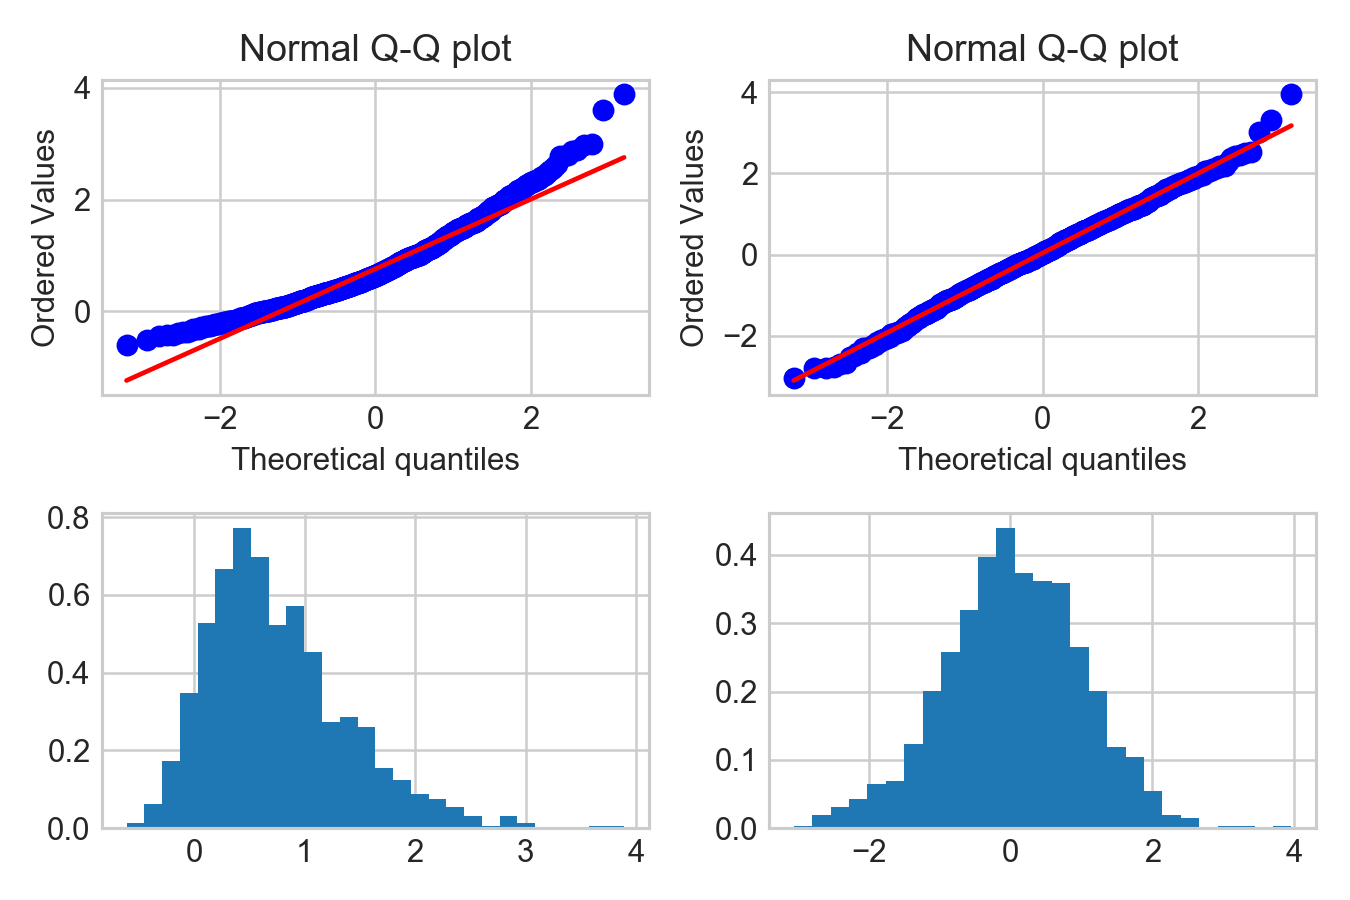

In [17]:
# plotting

plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(6, 4))

# Q-Q plot
stats.probplot(data_1, dist=stats.norm, plot=axes[0, 0])
stats.probplot(data_2, dist=stats.norm, plot=axes[0, 1])

axes[0, 0].set_title('Normal Q-Q plot')
axes[0, 1].set_title('Normal Q-Q plot')

axes[1, 0].hist(data_1, density=True, bins='auto')
axes[1, 1].hist(data_2, density=True, bins='auto')

fig.tight_layout()

<div id="boxcox"></div>

### 5.3 Transform to normal distribution: Box-Cox

When you want to construct a confidence interval of a sample, but the sample is non-normal, you have two options: transform the sample into a normal distribution, or use non-parametric alternatives. This section discusses the transformation part. 

<div class="highlights red-theme" id="boxcox-warning">
    <div class="highlights-title red-theme">WARNING!</div>
    <div class="highlights-content red-theme">Use transformation techniques only if you really know what you are doing! The assumptions & back-transform process related with non-normal to normal distributions are very tricky, and can lead to wrong inferences when implemented wrongly. Box-Cox transformations are most useful when the transformed variable has its own interpretation. For example, when the transformed variable is symmetric, taking an inverse of the transformed mean yields the median of the original variable. This is a useful property if your goal is to estimate the central tendecy of a distribution. But its useless if your goal is to inference the C.I. of the mean of the original variable, in which case you will use non-parametric alternatives like <a href="#python_bootstrap">bootstrap</a>.  
    </div>
</div>

There are three techniques used to map data to a normal distribution: Box-Cox, Yeo-Johnson, and normal quantile transform (check the <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html" target="_blank">SciPy documentation</a> to see the comparison plot of each tecnnique). I will discuss Box-Cox transformation here.

> **Box-Cox transformation** is a type of power transformation to convert non-normal data to normal data by raising the distribution to a power of lambda ($\lambda$). The algorithm automatically solves for $\lambda$ that best transforms a distribution into a normal distribution.

Box-Cox transformation is a statistical technique known to have remedial effects on highly skewed data. If $\lambda$ is determined to be 2, then the distribution will be raised to a power of 2 — $Y^2$. The exception to this rule is when the $\lambda$ is 0 - log will be taken to the distribution — log($Y$). Note that using a $\lambda = 1$ does not do anything to the distribution. If the Box-Cox algorithm spits out $\lambda = 1$, it probably means that your data is Gaussian-like or Gaussian enough to an extent that there is no need for transformation. The figure below shows the effect of raising the exponential distribution (left) with the power of $\lambda = .316$ to acquire the transformed normal distribution (right).

<div id="fig22" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width">
    <div class="col"><img src="jupyter_images/conf_int_box_cox.png"></div>
    <div class="col-12"><p class="image-description">Figure 22: Box-cox transformation</p></div>
</div>
<div class="solution_panel closed" style="margin-top: 20px;">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (22)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.plyplot as plt
                
                # generate sample data
                x = stats.expon.rvs(size=100, random_state=1)

                # Box-Cox transform
                xt, lmbda = stats.boxcox(x)

                # plot
                fig, axes = plt.subplots(2, 2, figsize=(10, 5))

                axes[0, 0].hist(x, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                axes[0, 1].hist(xt, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                stats.probplot(x, dist=stats.norm, plot=axes[1, 0])
                stats.probplot(xt, dist=stats.norm, plot=axes[1, 1])

                axes[0, 0].set_title('Original data')
                axes[0, 1].set_title(r'Transformed data,  $\lambda$=%.3f' % lmbda)
                axes[1, 0].set_title('Normal Q-Q plot')
                axes[1, 1].set_title('Normal Q-Q plot')
                axes[1, 1].set_ylabel('')

                for ax in axes.flatten():
                    ax.grid(True, linestyle='--', color='#acacac')
                    ax.text(0.05, 0.85, 'aegis4048.github.io', fontsize=12, transform=ax.transAxes, color='grey', alpha=0.5)

                for ax in axes.flatten()[2:]:
                    ax.get_lines()[0].set_marker('o')
                    ax.get_lines()[0].set_color('grey')
                    ax.get_lines()[0].set_markeredgecolor('black')
                    ax.get_lines()[0].set_markersize(5.0)
                    ax.get_lines()[0].set_alpha(0.5)
                    ax.get_lines()[1].set_linewidth(1.0)
                    ax.get_lines()[1].set_color('k')

                plt.subplots_adjust(wspace=13)
                fig.text(0.47, 0.33, 'Box-Cox', size=14, ha='center', va='top')
                fig.text(0.465, 0.3, r'$\Longleftrightarrow$', size=30, ha='center', va='top')
                fig.text(0.47, 0.8, 'Box-Cox', size=14, ha='center', va='top')
                fig.text(0.465, 0.77, r'$\Longleftrightarrow$', size=30, ha='center', va='top')
                fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

**Not all transformations work perfectly**

The example illustrated above is the most ideal case of Box-Cox transform. Not all transforms work perfectly, especially in case of heavy tails. Visualize your transformed histrogram, and the Q-Q plot to evaluate the performance of the transform. If the transform did not mitigate the skewness (this is rare), you will have to look for non-parametric alternatives, like <a href="#conf_int_of_other">bootstrap</a> explained above. If the transform did not mitigate the heavy-tails, your solution depends on the situation, as discussed <a href="#kurtosis">above</a>.
 
<div id="fig23" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width">
    <div class="col"><img src="jupyter_images/conf_int_box_cox_fail.png"></div>
    <div class="col-12"><p class="image-description">Figure 23: Box-cox transformation</p></div>
</div>
<div class="solution_panel closed" style="margin-top: 20px;">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (23)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.pyplot as plt

                # generate sample data
                x = stats.skewnorm.rvs(100, size=1000) + 1

                # Box-Cox transform
                xt, lmbda = stats.boxcox(x)

                # plot
                fig, axes = plt.subplots(2, 2, figsize=(10, 5))

                axes[0, 0].hist(x, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                axes[0, 1].hist(xt, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey', density=True)
                stats.probplot(x, dist=stats.norm, plot=axes[1, 0])
                stats.probplot(xt, dist=stats.norm, plot=axes[1, 1])

                axes[0, 0].set_title('Original data')
                axes[0, 1].set_title(r'Transformed data,  $\lambda$=%.3f' % lmbda)
                axes[1, 0].set_title('Normal Q-Q plot')
                axes[1, 1].set_title('Normal Q-Q plot')
                axes[1, 1].set_ylabel('')

                for ax in axes.flatten():
                    ax.grid(True, linestyle='--', color='#acacac')
                    ax.text(0.05, 0.85, 'aegis4048.github.io', fontsize=12, transform=ax.transAxes, color='grey', alpha=0.5)

                for ax in axes.flatten()[2:]:
                    ax.get_lines()[0].set_marker('o')
                    ax.get_lines()[0].set_color('grey')
                    ax.get_lines()[0].set_markeredgecolor('black')
                    ax.get_lines()[0].set_markersize(5.0)
                    ax.get_lines()[0].set_alpha(0.5)
                    ax.get_lines()[1].set_linewidth(1.0)
                    ax.get_lines()[1].set_color('k')

                plt.subplots_adjust(wspace=13)
                fig.text(0.47, 0.33, 'Box-Cox', size=14, ha='center', va='top')
                fig.text(0.465, 0.3, r'$\Longleftrightarrow$', size=30, ha='center', va='top')
                fig.text(0.47, 0.8, 'Box-Cox', size=14, ha='center', va='top')
                fig.text(0.465, 0.77, r'$\Longleftrightarrow$', size=30, ha='center', va='top')
                fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

**All data to be positive and greater than 0 (Y > 0)**

Box-Cox transformation does not work if data is smaller than 0. This can easily be fixed by adding a constant ($C$) that will make all your data greater than zero. The transformation equation is then:

<div id="" style="font-size: 1rem;">
$$Y^{'} = (Y + C)^{\lambda}$$
</div>

Note that you do not have to worry about this if you are using Yeo-Johnson transform instead of Box-Cox transform.

**Back-transformation**

Since box-cox transform raises a sample to the power of $\lambda$, the scale of your sample changes. While removing skewness in a sample is desirable, the change in scale is not. Once you construct the confidence interval of a statistic of your interest, you have to take the inverse of the $\lambda$ power to your estimated statistics to put it back to its original scale. In the same way, if you've added a constant $C$ to satisfy the assumption above, if have to subtract your statistical estimation by $C$ at the end.

<div><hr></div>

<div id="python_boxcox"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Box-Cox transform with SciPy and Scikit-Learn<p>

<p>There are two ways to do Box-Cox transform, and its back transform: with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox.html" target="_blank">scipy.special.boxcox</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html" target="_blank">sklearn.preprocessing.PowerTransformer</a>. Scipy's implementation is preferrable for one-dimensional data, and Scikit-Learn's for multi-dimensional data. Note that you also need to backtransform your data, or your calculated statistics to its original scale. Here, I will calculate the <a href="#non-normal-issues">centeral tendency of non-normal distribution</a>, which is described by a median.</p>

<div id="#scipy-boxcox"></div>

<p><b>SciPy Implementation</b></p>

<p>First, you need to transform the data with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox.html" target="_blank">scipy.special.boxcox</a>. Make sure to return & store <code>lmbda</code>, which raises the original distribution to the power of $\lambda$. You need it later to back-transform the calculated statistic into its original scale.</p>

<p></p>

Let's first generate non-normal sample data we are going to use, and take a look at it. Assess the normality of your sample with Q-Q plots explained <a href="#python_qq_plots">above</a>.

<IPython.core.display.Javascript object>


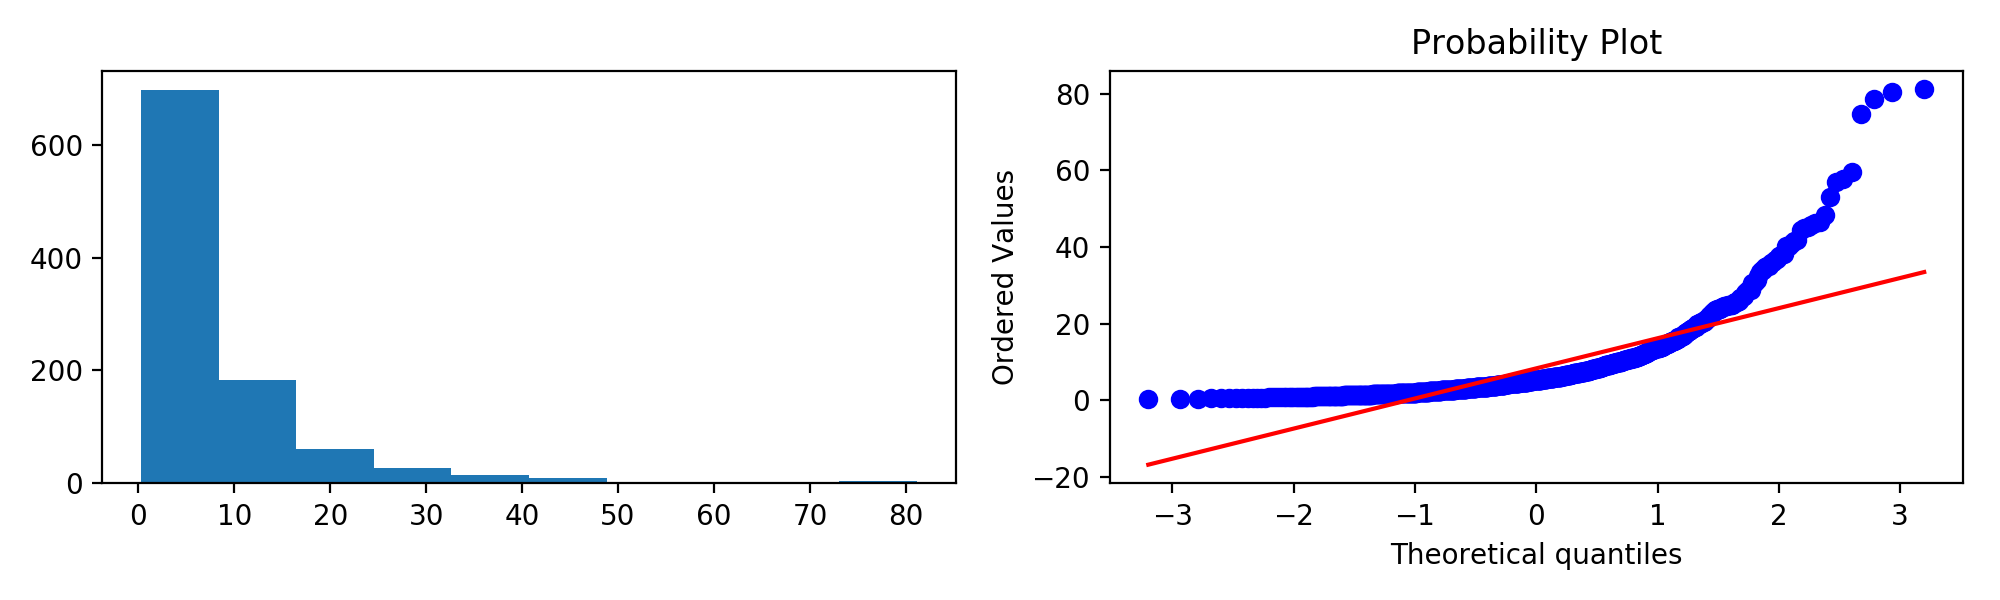

,count,mean,std,min,25%,50%,75%,max,Median
0,1000.0,8.300435,9.606277,0.279772,2.768348,5.256457,9.943978,81.145311,5.256457


In [26]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# generate non-normal sample
x = stats.lognorm.rvs(s=1, loc=0, scale=5, size=1000, random_state=4)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(x)
stats.probplot(x, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df = pd.DataFrame(x).describe().T
df['Median'] = np.median(x)
df

<div style="margin-top: -20px"></div>

The distribution seems to be non-normal. The mean is 8.30, and the median is 5.26. Let's transform this data into a normal distribution with Box-Cox transform, and see how it changes.

<IPython.core.display.Javascript object>


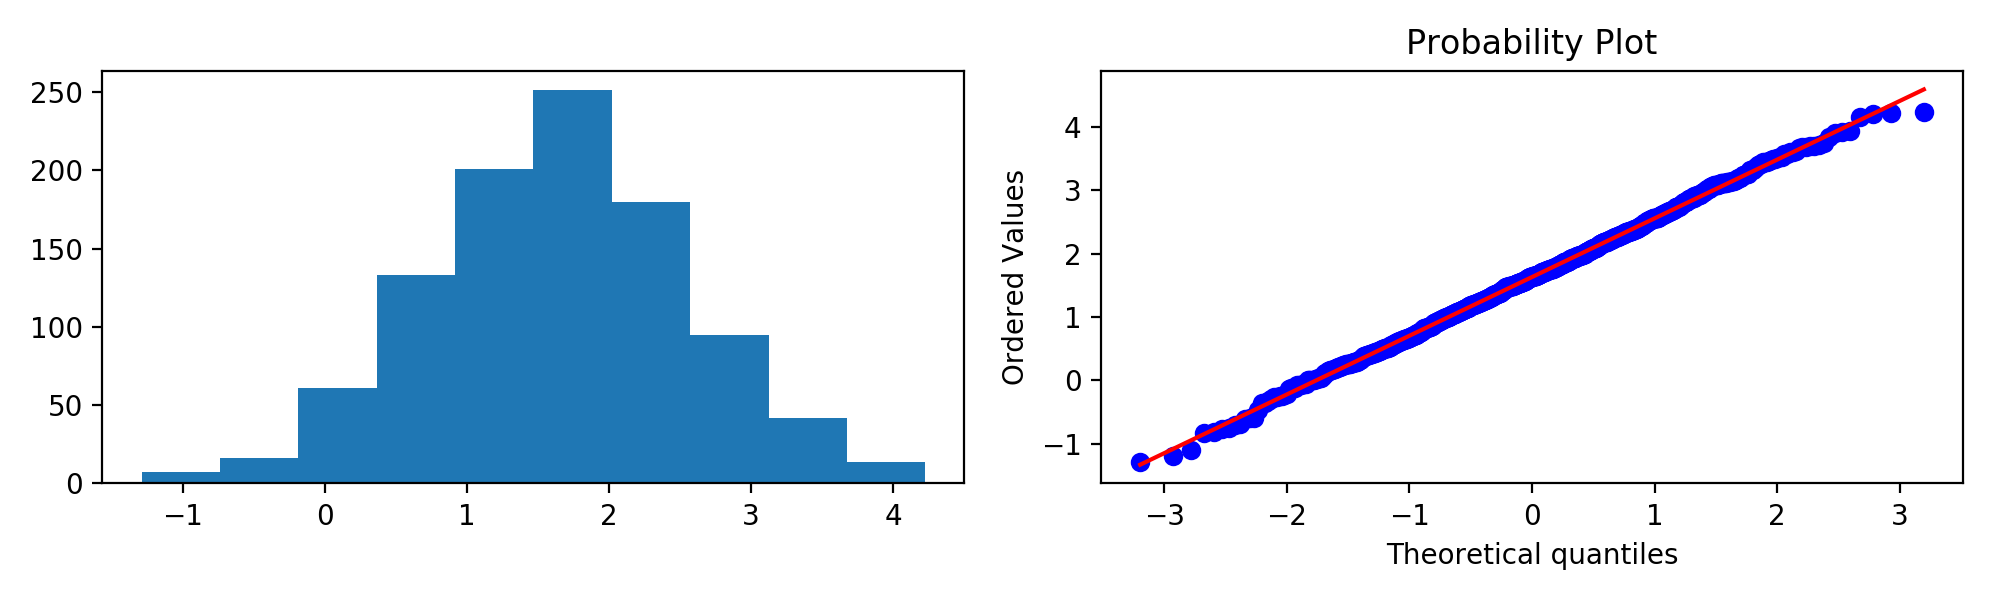

,count,mean,std,min,25%,50%,75%,max,Median
0,1000.0,1.628602,0.924383,-1.288433,1.009014,1.635019,2.250321,4.227487,1.635019


In [27]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# box-cox transform
xt, lmbda = stats.boxcox(x)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df = pd.DataFrame(xt).describe().T
df['Median'] = np.median(xt)
df

<div style="margin-top: -20px"></div>

The transformation seemed to work well. Note the change in scale due to transform. The mean changed from 8.30 to 1.63, and the median changed from 5.26 to 1.64. This shows the need to apply back-transformation to the calculated statistic.

We proceed to calculate the confidence interval of your statistic. In this case, we compute the 95% C.I. of mean, with the code snippet described <a href="#python_ci_mean">above</a>. If the transformation did not work well, use a non-parametric alternative explained <a href="#non_parametric_boxcox">below</a>.

In [5]:
import numpy as np
from scipy import stats

# 95% confidence interval of mean in a transformed scale
lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt, ddof=1), scale=stats.sem(xt))

(lo_xt, hi_xt)

(1.571239695096202, 1.6859642780066368)

<div style="margin-top: -20px"></div>

Note that the above C.I. of mean is in the transformed scale. We need to apply back-transform to put it back to its original scale. We use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.inv_boxcox.html" target="_blank">scipy.special.inv_boxcox</a>.

In [6]:
from scipy.special import inv_boxcox

# inverse transform
lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)

(lo_x, hi_x)

(4.922371850163526, 5.5398361421708175)

<div style="margin-top: -20px"></div>

Taking the inverse of the transformed C.I. of mean returned a range of 4.93 ~ 5.54. Recall that in the original sample, Mean = 8.30, and median = 5.26. The result is consistent with the statement in the WARNING <a href="#boxcox-warning">above</a>: <i>"when the transformed variable is symmetric, taking an inverse of the transformed mean yields the median of the original variable."</i>

Additionally, we can also try a non-parametric alternative, <a href="#python_bootstrap">bootstrap</a>, to obtain the C.I. of median of the non-normal distribution. Recall that the variable <code>x</code> generated above is a non-normal sample. One can see that the C.I. of median obtained from Box-Cox and bootstrap agree with each other.

In [7]:
import numpy as np

iteration = 100000

boot_median = [np.median(np.random.choice(x, len(x))) for _ in range(iteration)]
lo_x_boot = np.percentile(boot_median, 2.5)
hi_x_boot = np.percentile(boot_median, 97.5)

(lo_x_boot, hi_x_boot)

(4.832966540955844, 5.616555703219367)

<div id="scikit-boxcox"></div>

**Scikit-Learn implementation**

Box-cox transform can also be implemented with Scikiy Learn: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html" target="_blank">sklearn.preprocessing.PowerTransformer</a>. Scikit-Learn's implementation of box-cox transformation is specialized for multi-dimensional data, and therefore it accepts 2-D array as its input. It's ability to handle multi-dimensional data is quite useful in machine learning.

This function is available in versions <i>scikit-learn v0.20</i> or above. Most versions of Anaconda support <i>scikit-learn v0.19.1</i>. If you are using Anaconda Python, you will need to update Scikit Learn with the following command in the console (note that if you are using Jupyter Notebook, you must restart your Jupyter after upgrading Scikit-Learn):

In [40]:
# pip install scikit-learn==0.20

<div style="margin-top: -20px"></div>

For consistency, we will keep using the non-normal sample <code>x</code> I generated above. Before we start, recall that <code>x</code> is an 1-D array. Since Scikiy-Learn's Box-Cox expects 2-D array as input, you will have to change the data type into a numpy matrix with <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.asmatrix.html" target="_blank">np.asmatrix</a>:

In [5]:
import numpy as np

# convert data type
x_mat = np.asmatrix(x).T

<div style="margin-top: -20px"></div>

(Note: You need to have some basic understanding of Objected Oriented Programming (OOP) to understand this explanation)

Let's apply the transform. First, instantiate the transformer object <code>pt</code>. Second, fit the $\lambda$ parameter using <code>fit()</code>, which will store the $\lambda$ parameter as a class attribute inside the <code>pt</code> object. The $\lambda$ parameter stored will be used later to apply inverse transform. Last, use <code>transform()</code> to apply Box-Cox transformation. 

Note that appling <code>pt.fit()</code> and <code>pt.transform()</code> can also be done with one-line with <code>pt.fit_transform()</code>. 

<IPython.core.display.Javascript object>


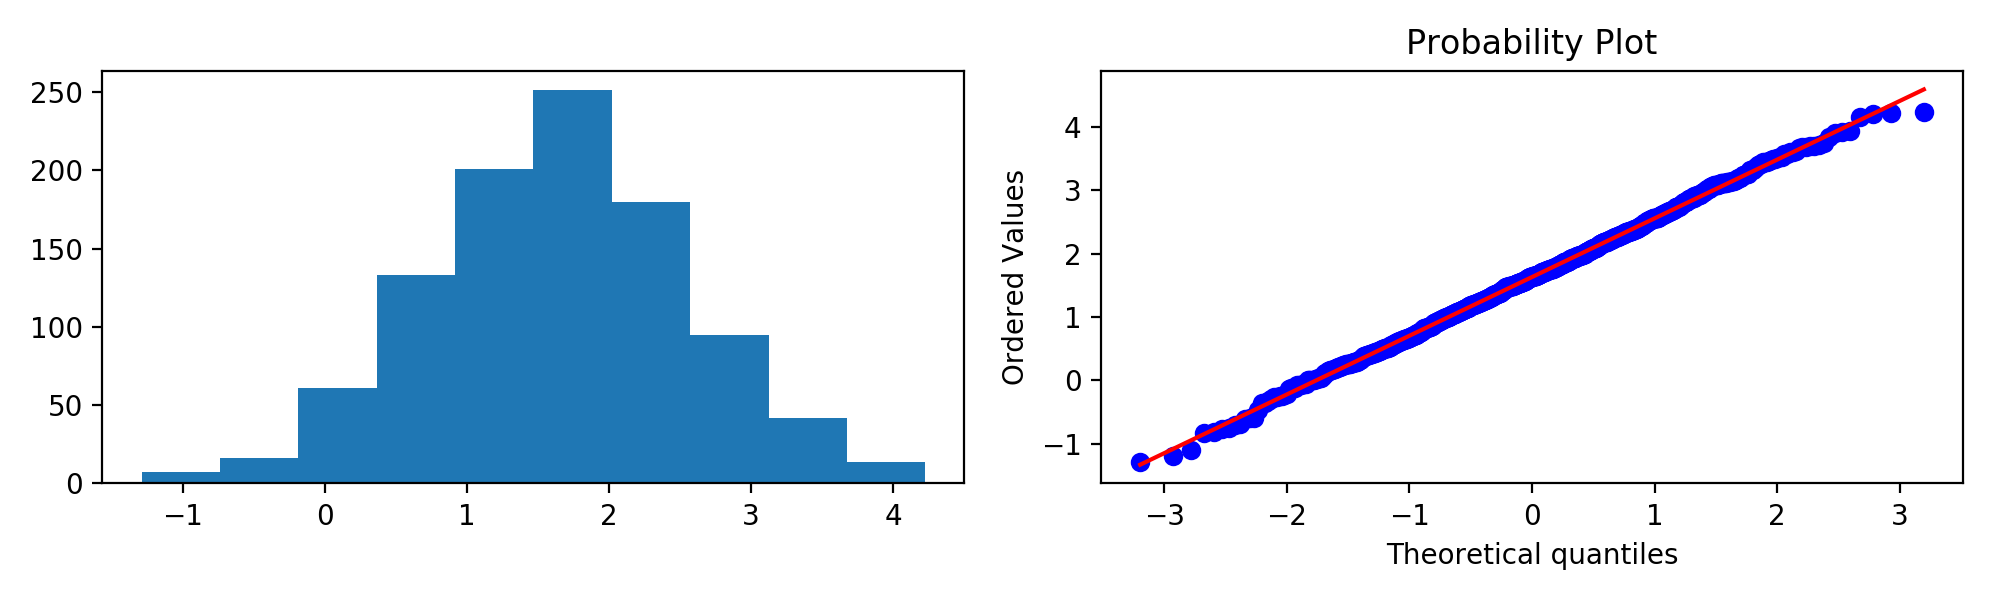

,count,mean,std,min,25%,50%,75%,max,Median
0,1000.0,1.628602,0.924383,-1.288433,1.009014,1.635019,2.250321,4.227487,1.635019


In [30]:
from sklearn.preprocessing import PowerTransformer

# box-cox transform
pt = PowerTransformer(method='box-cox', standardize=False)
pt.fit(x_mat)
xt = pt.transform(x_mat)

# convert data type for plotting
xt = xt.flatten()

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df = pd.DataFrame(xt).describe().T
df['Median'] = np.median(xt)
df

<div style="margin-top: -20px"></div>

From this point, the procedures for obtaining the C.I. of median of a non-normal distribution are the same as in SciPy's implementation, except that we use <code>pt.inverse_transform</code> (Scikit-Learn) instead of <code>inv_boxcox</code> (SciPy), and convert 1-D array to 2-D datatype array. Note that the output is the exact same is the one given by the SciPy implementation above.

In [29]:
import numpy as np
from scipy import stats

# 95% confidence interval of mean in a transformed scale
lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt), scale=stats.sem(xt))

# convert data type
lo_xt_mat = np.asmatrix(lo_xt)
hi_xt_mat = np.asmatrix(hi_xt)

# inverse transform
hi_x = pt.inverse_transform(hi_xt_mat)[0][0]
lo_x = pt.inverse_transform(lo_xt_mat)[0][0]

(lo_x, hi_x)

(4.9223718501635245, 5.539836142170828)

<div id="non_parametric_bootstrap"></div>

### 5.4 Non-parametric alternative: Bootstrap

(Note: This section is a continuation of <i>Section 4.4. Confidence interval of other statistics: Bootstrap</i> explained <a href="#conf_int_of_other">above</a>. For bootstrap code, navigate to <a href="#python_bootstrap">here</a>.)

Bootstrap is the most popular choice when making a point estimation of a population parameter of an unknown distribution. It is distribution-free. This means that it does not assume anything about the shape of the distribution (Ex: normal, lognormal, weibull, exponential). For example, computing the confidence interval of mean with <a href="#eq-1">eq (1)</a> requires symmetry of a distribution, as it relies on $\pm$ standard error method. Any parametric methods (Ex: t-test, f-test) that assume normality of data has less coverage than their non-parametric alternatives when their assumptions are violated. 

Let's take a deeper look at the robustness of parametric vs non-parametric methods for different distributions by running simulations. We compute the confidence interval of mean and variance. CI of mean is known to be resistent to deviation from normality, while CI of variance is very sensitive. The procedure is as follows:

<ol class="rounded-list" style="margin-bottom: 40px !important; margin-top: 40px! important;">
    <li><p>Randomly generate <code>POPUPLATION_SIZE</code> observations from a specified distribution. Assume this to be a population. We generate 4 populations: normal, exponential, skewed, and lognormal. Each population goes through step 2-5.</p></li>
    <li><p>Randomly draw samples <code>NUM_SAMPLES</code> times from a population. Each sample has a size = <code>SAMPLE_SIZE</code>. Each sample goes through step 3-4.</p></li>
    <li><p>Compute the parametric & non-parametric 95% confidence interval of variance and mean for a sample. For parametric CI of mean and variance, use <a href="#eq-1">eq (1)</a> and <a href="#eq-10">eq (10)</a>. For non-parametric CI, use <a href="#python_bootstrap">bootstrap</a>.</p></li>
    <li><p>Check if a population mean or variance falls within the computed confidence interval.</p></li>
    <li><p>Count the number of times a population mean and variance falls within the computed confidence interval.</p></li>
</ol>

The above procedure describes a situation in which we attempt to inference the unknown population parameters from a small portion of the population, a.k.a. the samples (check <i>Section 3. Population vs Samples</i> <a href="#3.-Population-vs.-samples">above</a>). We want to know if the computed confidence interval of samples contain the true population parameter. <a href="#fig24">Figure (24)</a> summarizes the simulation result:

<div id="fig24" class="row full_screen_margin_md mobile_responsive_plot_full_width">
    <div class="col"><img class="admonition-image" src="jupyter_images/conf_int_coverage.png"></div>
    <div class="col-12"><p class="image-description">Figure 24: Coverage of parametric vs non-parametric confidence intervals</p></div>
</div>
<div class="solution_panel closed" style="margin-top: 20px;">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (24)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.pyplot as plt
                import numpy as np

                # simulation settings
                POPUPLATION_SIZE = 100000
                NUM_SAMPLES = 10000
                SAMPLE_SIZE = 100
                BOOT_SAMPLE_SIZE = 100

                # analytical confidence interval of mean
                def ci_mean_analy(arr, alpha):
                    return stats.t.interval(1 - alpha, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))

                # bootstrap confidence interval of mean
                def ci_mean_boot(arr, p_lo, p_hi, r=BOOT_SAMPLE_SIZE):
                    boot_var = [np.mean(np.random.choice(arr, len(arr))) for _ in range(r)]
                    lo = np.percentile(boot_var, p_lo)
                    hi = np.percentile(boot_var, p_hi)
                    return (lo, hi)

                # analytical confidence interval of variance
                def ci_var_analy(arr, alpha):
                    lo, hi = (
                        (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(1 - alpha / 2, len(arr) - 1),
                        (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(alpha / 2, len(arr) - 1)
                    )    
                    return (lo, hi)

                # bootstrap confidence interval of variance
                def ci_var_boot(arr, p_lo, p_hi, r=BOOT_SAMPLE_SIZE):
                    boot_var = [np.var(np.random.choice(arr, len(arr)), ddof=1) for _ in range(r)]
                    lo = np.percentile(boot_var, p_lo)
                    hi = np.percentile(boot_var, p_hi)
                    return (lo, hi)

                # check if the confidence interval includes the population parameter
                def coverage_test(lo, hi, target):
                    if lo <= target <= hi:
                        return 1
                    else:
                        return 0

                # define population
                norm_pop = stats.norm.rvs(size=POPUPLATION_SIZE, scale=100)
                expon_pop = stats.expon.rvs(size=POPUPLATION_SIZE, scale=100)
                skew_pop = stats.skewnorm.rvs(a=50, size=POPUPLATION_SIZE, scale=100)
                lognorm_pop = stats.lognorm.rvs(1, size=POPUPLATION_SIZE, scale=100)

                # population mean
                mean_norm_pop = np.mean(norm_pop)
                mean_expon_pop = np.mean(expon_pop)
                mean_skew_pop = np.mean(skew_pop)
                mean_lognorm_pop = np.mean(lognorm_pop)

                # population variance
                var_norm_pop = np.var(norm_pop, ddof=0)
                var_expon_pop = np.var(expon_pop, ddof=0)
                var_skew_pop = np.var(skew_pop, ddof=0)
                var_lognorm_pop = np.var(lognorm_pop, ddof=0)

                # initialize
                count_mean_norm_analy, count_mean_expon_analy, count_mean_skew_analy, count_mean_lognorm_analy = [], [], [], []
                count_mean_norm_boot, count_mean_expon_boot, count_mean_skew_boot, count_mean_lognorm_boot = [], [], [], []
                count_var_norm_analy, count_var_expon_analy, count_var_skew_analy, count_var_lognorm_analy = [], [], [], []
                count_var_norm_boot, count_var_expon_boot, count_var_skew_boot, count_var_lognorm_boot = [], [], [], []

                for i in range(NUM_SAMPLES):

                    # randomly draw samples from population
                    norm_samp = np.random.choice(norm_pop, SAMPLE_SIZE)
                    expon_samp = np.random.choice(expon_pop, SAMPLE_SIZE)
                    skew_samp = np.random.choice(skew_pop, SAMPLE_SIZE)
                    lognorm_samp = np.random.choice(lognorm_pop, SAMPLE_SIZE)

                    # 95% ANALYTICAL confidence interval of MEAN
                    mean_lo_norm_analy, mean_hi_norm_analy = ci_mean_analy(norm_samp, 0.05)
                    mean_lo_expon_analy, mean_hi_expon_analy = ci_mean_analy(expon_samp, 0.05)
                    mean_lo_skew_analy, mean_hi_skew_analy = ci_mean_analy(skew_samp, 0.05)
                    mean_lo_lognorm_analy, mean_hi_lognorm_analy = ci_mean_analy(lognorm_samp, 0.05)

                    # 95% BOOTSTRAP confidence interval of MEAN
                    mean_lo_norm_boot, mean_hi_norm_boot = ci_mean_boot(norm_samp, 2.5, 97.5)
                    mean_lo_expon_boot, mean_hi_expon_boot = ci_mean_boot(expon_samp, 2.5, 97.5)
                    mean_lo_skew_boot, mean_hi_skew_boot = ci_mean_boot(skew_samp, 2.5, 97.5)
                    mean_lo_lognorm_boot, mean_hi_lognorm_boot = ci_mean_boot(lognorm_samp, 2.5, 97.5)

                    # 95% ANALYTICAL confidence interval of VARIANCE
                    var_lo_norm_analy, var_hi_norm_analy = ci_var_analy(norm_samp, 0.05)
                    var_lo_expon_analy, var_hi_expon_analy = ci_var_analy(expon_samp, 0.05)
                    var_lo_skew_analy, var_hi_skew_analy = ci_var_analy(skew_samp, 0.05)
                    var_lo_lognorm_analy, var_hi_lognorm_analy = ci_var_analy(lognorm_samp, 0.05)

                    # 95% BOOSTRAP confidence interval of VARIANCE
                    var_lo_norm_boot, var_hi_norm_boot = ci_var_boot(norm_samp, 2.5, 97.5)
                    var_lo_expon_boot, var_hi_expon_boot = ci_var_boot(expon_samp, 2.5, 97.5)
                    var_lo_skew_boot, var_hi_skew_boot = ci_var_boot(skew_samp, 2.5, 97.5)
                    var_lo_lognorm_boot, var_hi_lognorm_boot = ci_var_boot(lognorm_samp, 2.5, 97.5)

                    # coverage test for ANALYTICAL CI of MEAN
                    count_mean_norm_analy.append(coverage_test(mean_lo_norm_analy, mean_hi_norm_analy, mean_norm_pop))
                    count_mean_expon_analy.append(coverage_test(mean_lo_expon_analy, mean_hi_expon_analy, mean_expon_pop))
                    count_mean_skew_analy.append(coverage_test(mean_lo_skew_analy, mean_hi_skew_analy, mean_skew_pop))
                    count_mean_lognorm_analy.append(coverage_test(mean_lo_lognorm_analy, mean_hi_lognorm_analy, mean_lognorm_pop))

                    # coverage test for BOOTSTRAP CI of MEAN
                    count_mean_norm_boot.append(coverage_test(mean_lo_norm_boot, mean_hi_norm_boot, mean_norm_pop))
                    count_mean_expon_boot.append(coverage_test(mean_lo_expon_boot, mean_hi_expon_boot, mean_expon_pop))
                    count_mean_skew_boot.append(coverage_test(mean_lo_skew_boot, mean_hi_skew_boot, mean_skew_pop))
                    count_mean_lognorm_boot.append(coverage_test(mean_lo_lognorm_boot, mean_hi_lognorm_boot, mean_lognorm_pop))

                    # coverage test for ANALYTICAL CI of VARIANCE
                    count_var_norm_analy.append(coverage_test(var_lo_norm_analy, var_hi_norm_analy, var_norm_pop))
                    count_var_expon_analy.append(coverage_test(var_lo_expon_analy, var_hi_expon_analy, var_expon_pop))
                    count_var_skew_analy.append(coverage_test(var_lo_skew_analy, var_hi_skew_analy, var_skew_pop))
                    count_var_lognorm_analy.append(coverage_test(var_lo_lognorm_analy, var_hi_lognorm_analy, var_lognorm_pop))

                    # coverage test for BOOTSTRAP CI of VARIANCE
                    count_var_norm_boot.append(coverage_test(var_lo_norm_boot, var_hi_norm_boot, var_norm_pop))
                    count_var_expon_boot.append(coverage_test(var_lo_expon_boot, var_hi_expon_boot, var_expon_pop))
                    count_var_skew_boot.append(coverage_test(var_lo_skew_boot, var_hi_skew_boot, var_skew_pop))
                    count_var_lognorm_boot.append(coverage_test(var_lo_lognorm_boot, var_hi_lognorm_boot, var_lognorm_pop))

                print()
                print('###########################################################')
                print('                     Coverage Test (%)                     ')
                print('###########################################################')
                print()
                print()
                print('------------------ Parametric CI of mean ------------------')
                print()
                print('{:<40}  {:>15} %'.format('Normal Population: ', round(sum(count_mean_norm_analy) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Exponential Population: ', round(sum(count_mean_expon_analy) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Skewed Population: ', round(sum(count_mean_skew_analy) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Lognormal Population: ', round(sum(count_mean_lognorm_analy) / NUM_SAMPLES * 100, 1)))
                print()
                print('------------------ Non-parametric CI of mean --------------')
                print()
                print('{:<40}  {:>15} %'.format('Normal Population: ', round(sum(count_mean_norm_boot) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Exponential Population: ', round(sum(count_mean_expon_boot) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Skewed Population: ', round(sum(count_mean_skew_boot) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Lognormal Population: ', round(sum(count_mean_lognorm_boot) / NUM_SAMPLES * 100, 1)))
                print()
                print('---------------- Parametric CI of variance ----------------')
                print()
                print('{:<40}  {:>15} %'.format('Normal Population: ', round(sum(count_var_norm_analy) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Exponential Population: ', round(sum(count_var_expon_analy) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Skewed Population: ', round(sum(count_var_skew_analy) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Lognormal Population: ', round(sum(count_var_lognorm_analy) / NUM_SAMPLES * 100, 1)))
                print()
                print('---------------- Non-parametric CI of variance ------------')
                print()
                print('{:<40}  {:>15} %'.format('Normal Population: ', round(sum(count_var_norm_boot) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Exponential Population: ', round(sum(count_var_expon_boot) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Skewed Population: ', round(sum(count_var_skew_boot) / NUM_SAMPLES * 100, 1)))
                print('{:<40}  {:>15} %'.format('Lognormal Population: ', round(sum(count_var_lognorm_boot) / NUM_SAMPLES * 100, 1)))
            </code>
        </pre>
    </div>
</div>

<div><hr></div>

<div id="assumptions_boot"></div>

**Highlights of the simulation result**

There are lots of things we can learn from the simulation result, shown in <a href="#fig24">figure (24)</a>. I want to mainly emphasize on the distinction between the parametric vs. non-parametric methods here. Note that <i>bootstrap</i> is one kind of non-parametric methods

<div id="non-parametric_1"></div>
<ol class="custom-counter" style="counter-reset: lis 0;">
  <li><p class="numbering-p">Some statistics are sensitive to deviation from normality</p></li>
</ol>

<div class="left-pad-border">
    <p>Mean is resistent to deviation from normality, while variance is not. One of the reason that t-test is so popular is because the C.I. of mean is resistent to deviation from normality (which is translated as broader applicability). On the other hand, C.I. of variance is rarely used due to its extreme sensitivity (check out <i>Section 4.3. Confidence interval of variance</i> <a href="#conf_int_of_var">above</a>). Similar idea applies to the other statistics (Ex: covariance, regression coefficient, f-statistic). Do not blindly use parametric methods if you are not sure if a population satisfies the assumptions.</p>
</div>

<div id="non-parametric_2"></div>
<ol class="custom-counter" style="counter-reset: lis 1;">
  <li><p class="numbering-p">Parametric methods acquire 95% nominal coverage rate ONLY under normality</p></li>
</ol>

<div class="left-pad-border">
    <p>This is an expected behavior, as I specified the confidence level to be 95% in the simulation setting; it means that I want the C.I. to corretly guess the population parameter 19/20 times. Parametric C.I.'s were able to acquire the norminal 95% coverage rate under normality, but when the population was not normal, it acquired lower coverage rate due to the violation of normality.</p>
</div>

<div id="non-parametric_3"></div>
<ol class="custom-counter" style="counter-reset: lis 2;">
  <li><p class="numbering-p">Making an inference about heavy-tailed distribution is difficult.</p></li>
</ol>

<div class="left-pad-border">
    <p>Exponential and lognormal distributions have heavier tails than normal distribution. This means that they have extreme data points that significantly affect the population parameter, and yet the occurrence rate of those extreme points is so low that they are unlikely to be included in the collected samples, which in turn increases bias. Theoretically, exponential is heavier-tailed than normal, and lognormal is heavier-tailed than exponential. In the simulation result, you can see that the coverage rate drops in order: normal -> exponential -> lognormal. For more information check out <i>Problems with kurtosis (heavy-tails)</i> <a href="#kurtosis">above</a>.</p>
</div>

<div id="non-parametric_4"></div>
<ol class="custom-counter" style="counter-reset: lis 3;">
  <li><p class="numbering-p">Bootstrap outperforms parametric method under non-normality</p></li>
</ol>

<div class="left-pad-border">
    <p>This is the whole point of using non-parametric methods. We can see this by comparing the coverage rate of variance for exponential and lognormal populations. For the variance of lognormal distribution, the difference in coverage rate is almost double. </p>
</div>

<div id="non-parametric_5"></div>
<ol class="custom-counter" style="counter-reset: lis 4;">
  <li><p class="numbering-p">Parametric method outperforms non-parametric method under normality</p></li>
</ol>

<div class="left-pad-border">
    <p>You don't want to blindly always use non-parametric methods. If you are confident that your population is normally distributed, use parametric method. Not doing so results in abandoning a piece of information which is perfectly fine. You can see this by comparing the coverage rate of normal distribution for both parametric and non-parametric methods. An exception to this rule is when a sample size very large. In that case, you can blindly use bootstrap, as the samples are diverse enough to account for all possible variations within a population. Check out <a href="#fig13">figure (13)</a>; bootstrap C.I. gets approximates the analytical C.I. really well with the increasing sample size.</p>
</div>

<div id="non-parametric_6"></div>
<ol class="custom-counter" style="counter-reset: lis 5;">
  <li><p class="numbering-p">Non-parametric methods yield "approximate" solutions with smaller risk</p></li>
</ol>

<div class="left-pad-border">
    <p>The central idea behind most non-parametric methods is to approximate the <i>near-exact</i> solution with asymptotic process — their accuracy increases with the increasing sample size. Pay attention to the term, <i>"near-exact"</i>. Parametric methods are statistically more powerful when their assumptions are met; they guess the <i>exact</i> solution. But in return, when the assumptions are not met, they suffer massive loss in coverage rate, as it can be seen in the C.I. of variance of lognormal & exponential distributions. On the other hand, non-parametric methods highlight on broader applicability with smaller risk, which can be overcome by increasing sample size. They aim to acquire near-exact solutions by making less assumptions about the population.</p>
</div>